We see that our dataset is mad of $n=82$ and $p=22$. These are its main features of the subset and the first trhree rows.

Let's also plot the histogram of Price  in order to check normality and the boxplot, otherwise let's apply a log transformation.
It easy to see that is better consider a log-tranformation. So I will refer to price variable as log(price) in the following analysis.

[1] "cars"   "mydata"

[1] "Type"               "Price"              "MPG.city"          
 [4] "MPG.highway"        "AirBags"            "DriveTrain"        
 [7] "Cylinders"          "EngineSize"         "Horsepower"        
[10] "RPM"                "Rev.per.mile"       "Man.trans.avail"   
[13] "Fuel.tank.capacity" "Passengers"         "Length"            
[16] "Wheelbase"          "Width"              "Turn.circle"       
[19] "Rear.seat.room"     "Luggage.room"       "Weight"            
[22] "Origin"

[1] 82

[1] 22

Price MPG.city Horsepower Origin  AirBags           
1 15.9  25       140        non-USA None              
2 33.9  18       200        non-USA Driver & Passenger
3 29.1  20       172        non-USA Driver only

     Price          MPG.city       Horsepower        Origin  
 Min.   : 7.40   Min.   :16.00   Min.   : 55.0   USA    :42  
 1st Qu.:11.65   1st Qu.:19.00   1st Qu.:100.0   non-USA:40  
 Median :16.10   Median :22.00   Median :134.5               
 Mean   :19.17   Mean   :23.09   Mean   :140.0               
 3rd Qu.:23.60   3rd Qu.:25.00   3rd Qu.:170.0               
 Max.   :61.90   Max.   :46.00   Max.   :300.0               
               AirBags  
 Driver & Passenger:16  
 Driver only       :38  
 None              :28  
                        
                        
                        

[1] 0

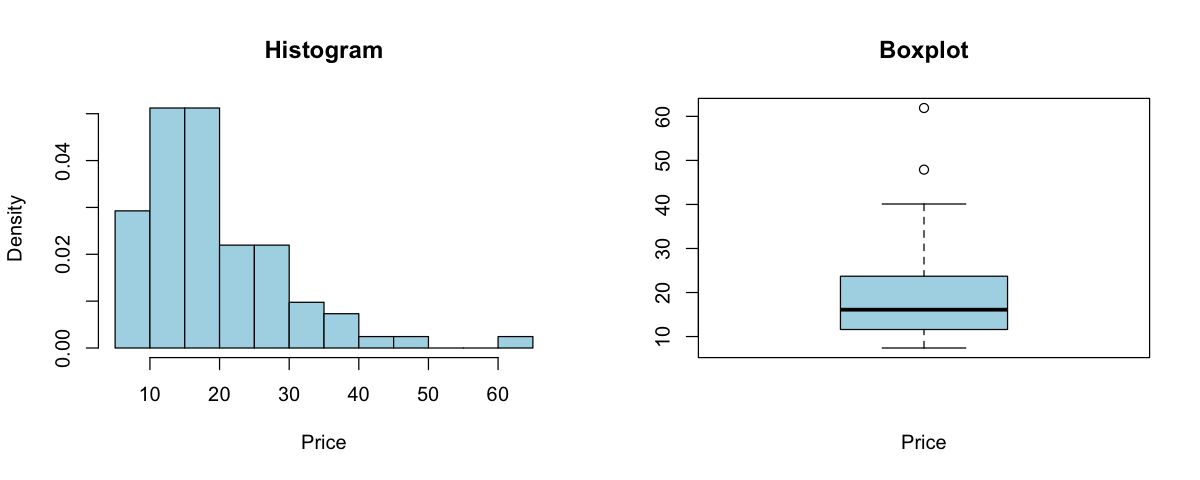

Price    MPG.city Horsepower Origin  AirBags           
1 2.766319 25       140        non-USA None              
2 3.523415 18       200        non-USA Driver & Passenger
3 3.370738 20       172        non-USA Driver only

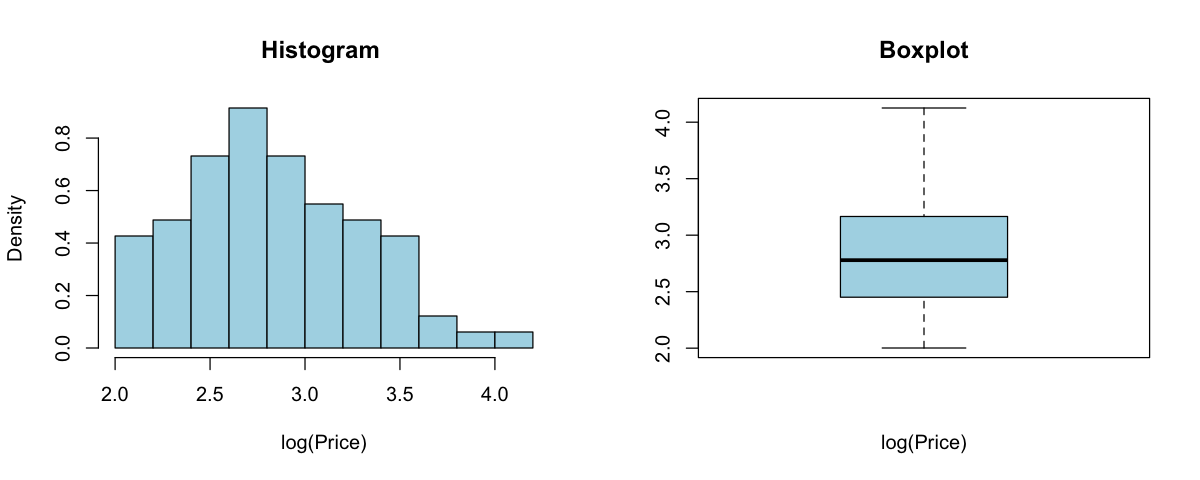

In [4]:
## load the data

load("cars.RData")
ls()
names(cars)
mydata<-cars
nrow(mydata)
ncol(mydata)

mydata <- mydata[, c('Price', 'MPG.city', 'Horsepower', 'Origin', 'AirBags')]
mydata[1:3,]

summary(mydata)

#check NA values
sum(is.na(mydata))
#clean from NA
mydata <- na.omit(mydata)

#check that they are factors otherwise make it

mydata$Origin<-as.factor(mydata$Origin)


mydata$AirBags<-as.factor(mydata$AirBags)


## SE HAI VARIABILI QUALITATIVE CON DEI LIVELLI PLOTTA LA TABELLA 

par(mfrow=c(1,2))
options(repr.plot.width = 10, repr.plot.height = 4)
hist(mydata$Price, prob=TRUE, xlab='Price', main='Histogram',col="lightblue")
boxplot(mydata$Price, xlab='Price', main='Boxplot',col="lightblue" )
hist(log(mydata$Price), prob=TRUE, xlab='log(Price)', main='Histogram ',col="lightblue")
boxplot(log(mydata$Price), xlab='log(Price)', main='Boxplot',col="lightblue" )

mydata$Price<-log((mydata$Price))

mydata[1:3,]


 Let also check the relationship between Y and the covariates X. From this plot we can see a kind of  linear relationship between horsepower and price and an inverse relationship between MPG.city and Price._

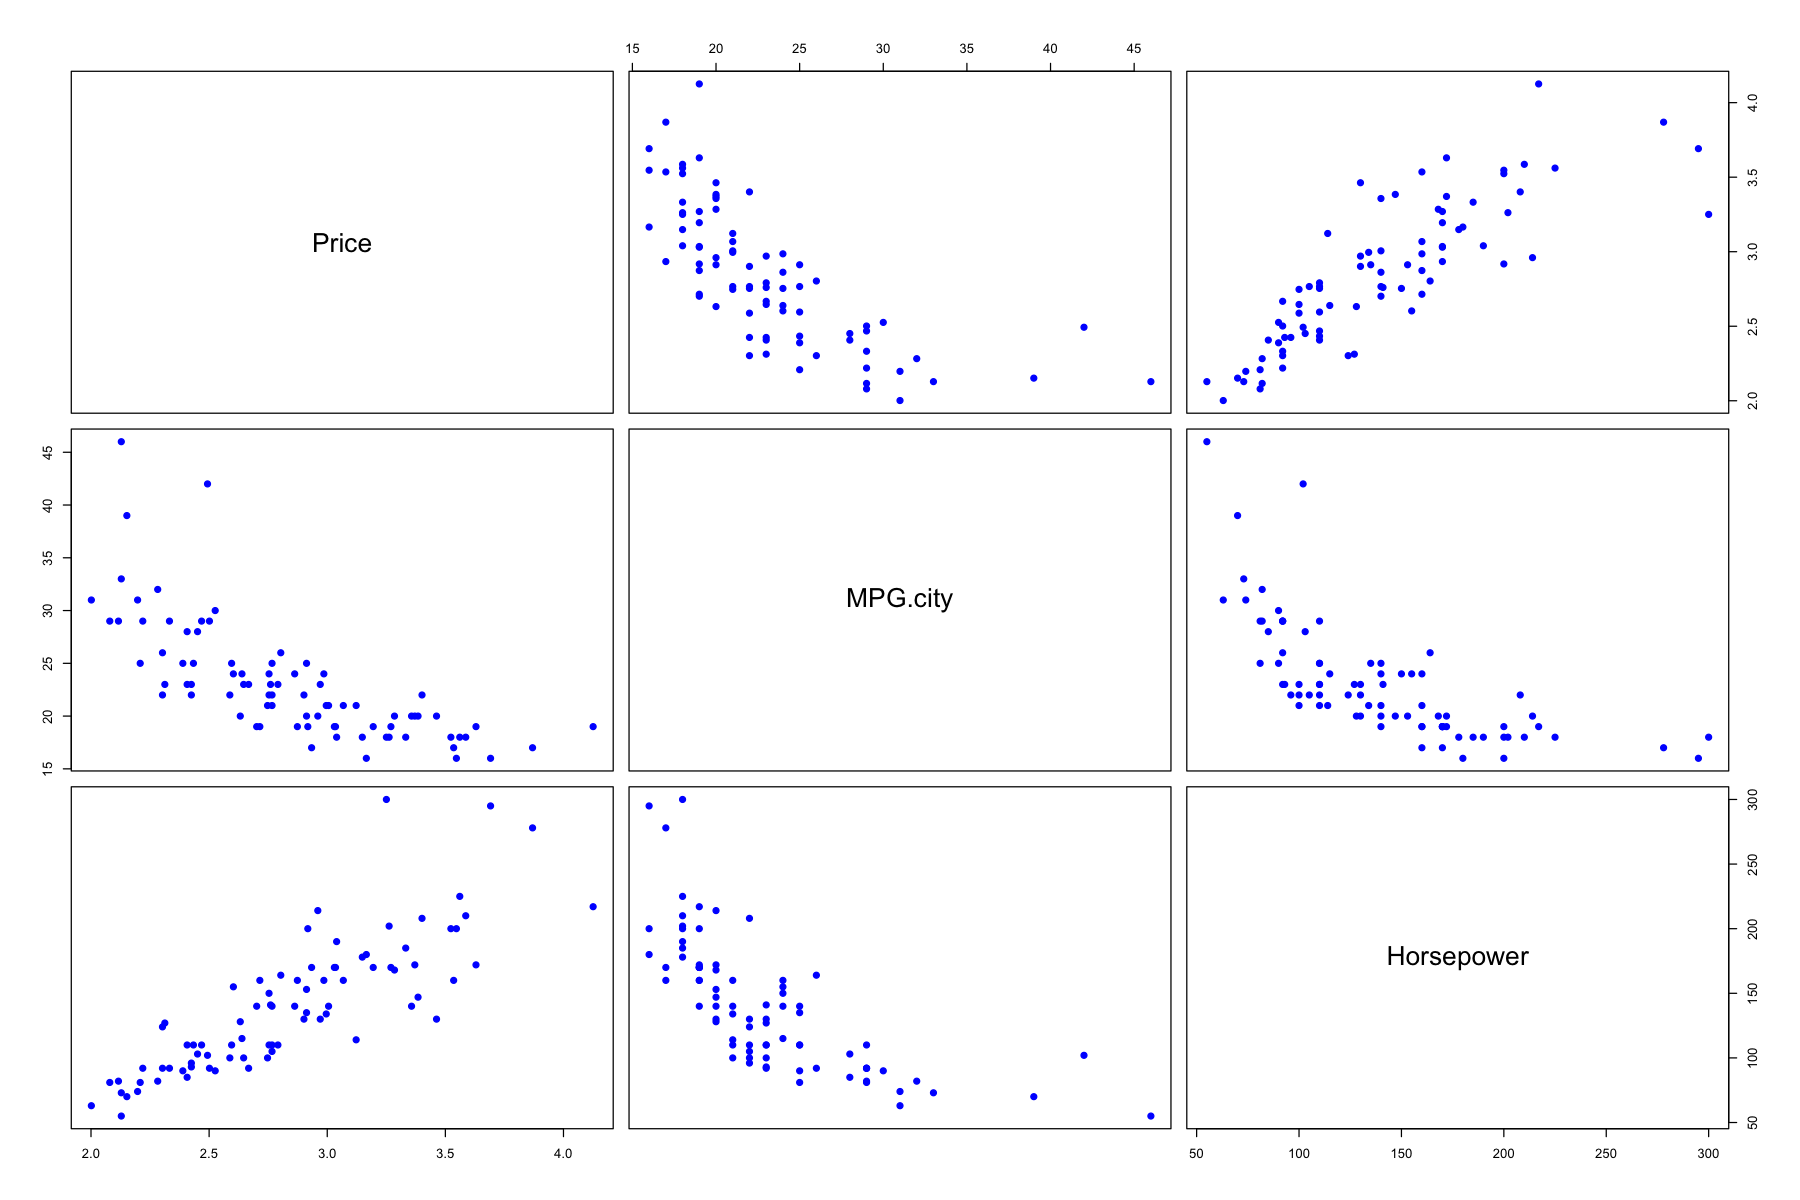

In [8]:
options(repr.plot.width = 15, repr.plot.height = 10)
pairs(mydata[,c(1,2,3)],col="blue",pch=19)


 
Regardign the interections between variables we see from the following plots that the partial overlapping of the observations in the first scatterplot (from left first row )siggest that there would not be interactions, in the second (from left first row) se have a partial overlapping but we can distinguish somehow the types so maybe we will have interactions. In the third (from left second row ) we have a bit of overlapping but again we can distinguish to lines that could be intersect so maybe there would be interaction and also in the fourth scatterplot (from left second row ).

As concerns the boxplots:

- first boxplot( first row from left): medians almost equal suggesting that there would not be interactions. We also don't have outliers

- second boxplot( first row from left): we difference between medians so this suggests possible interactions between the variables. In this case we  have outliers


- third boxplot( second row from left): medians almost equal suggesting that there would not be interactions. We also  have outliers

- fourth boxplot( second row from left): we difference between medians so this suggests possible interactions between the variables. Also in this case we don't have outliers


- fifth boxplot( third row from left): medians almost equal suggesting that there would not be interactions. We also  have outliers

- soxthboxplot( third row from left): we difference between medians so this suggests possible interactions between the variables. Also in this case we don't have outliers.

We also plot the mosaicplot between the two qualitative variables

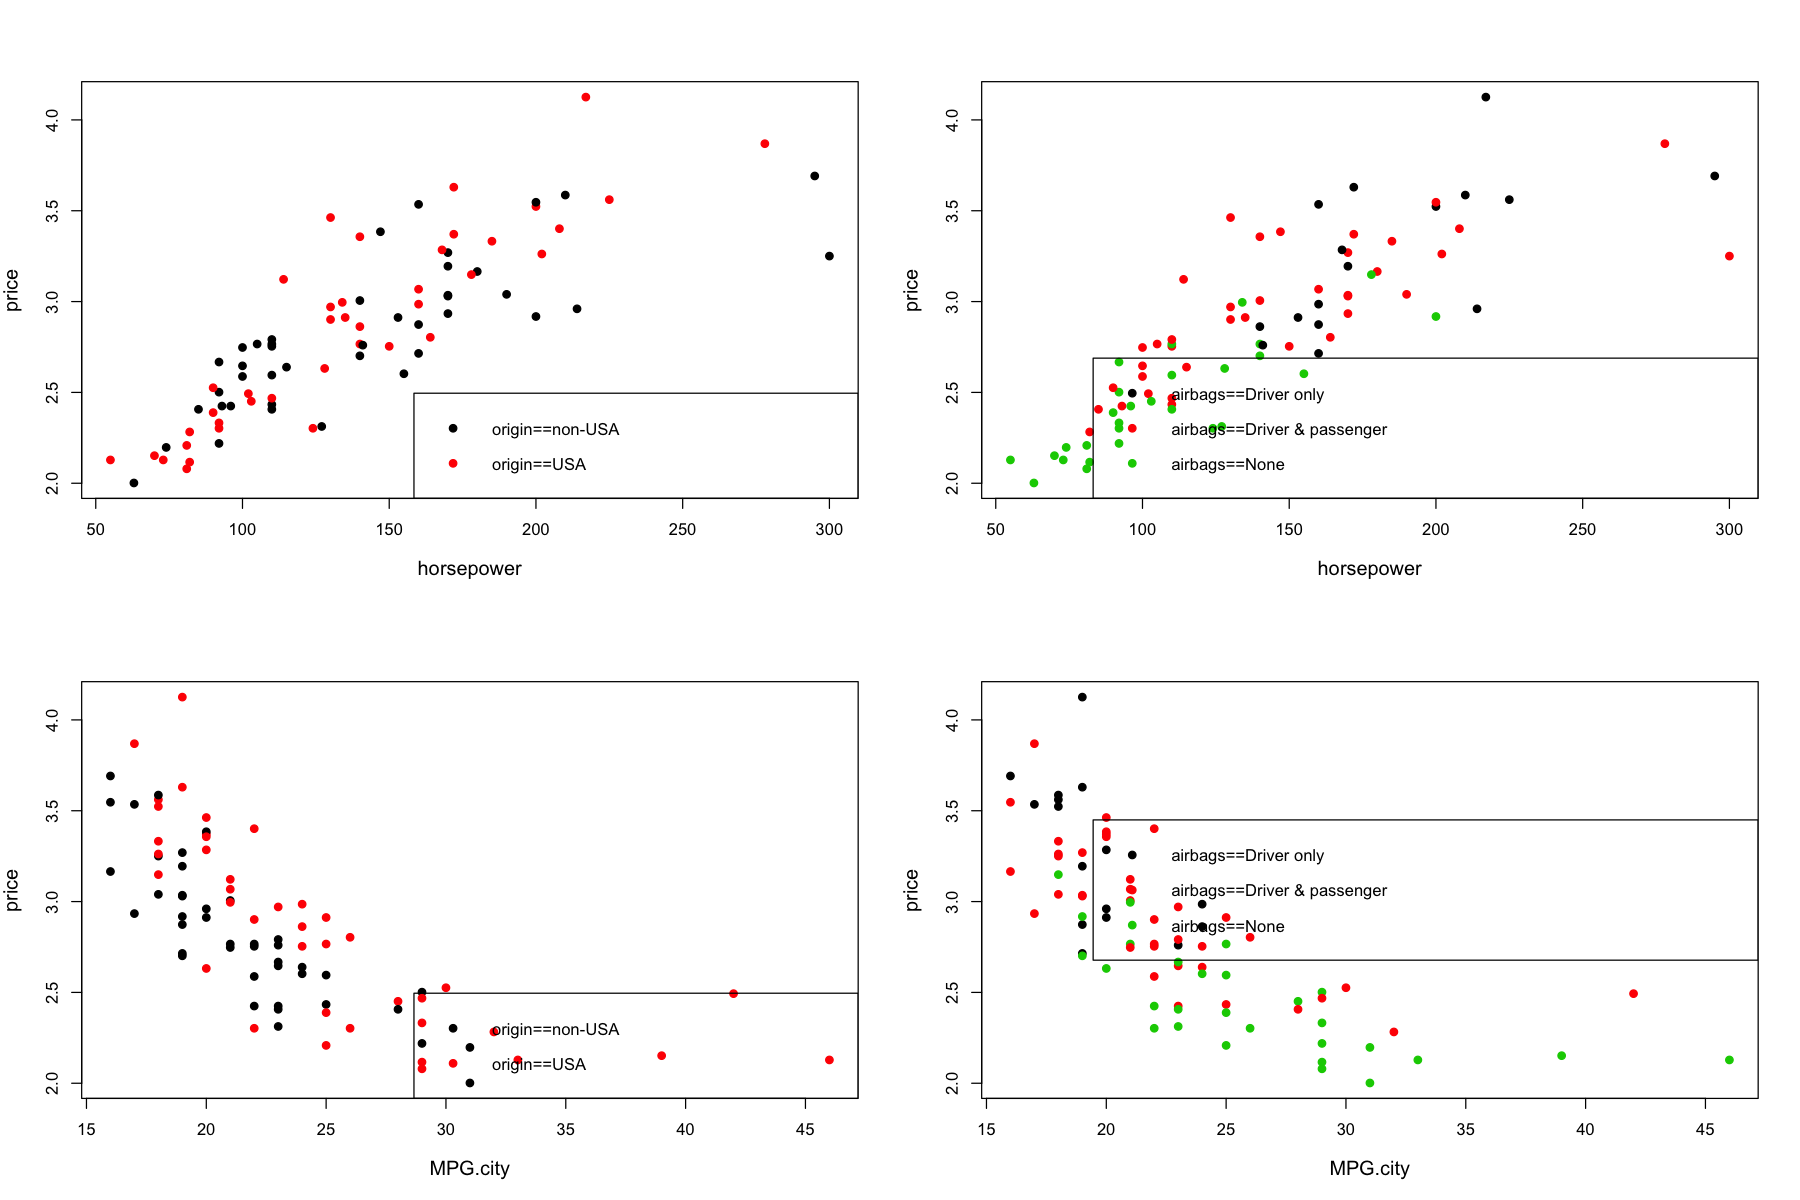

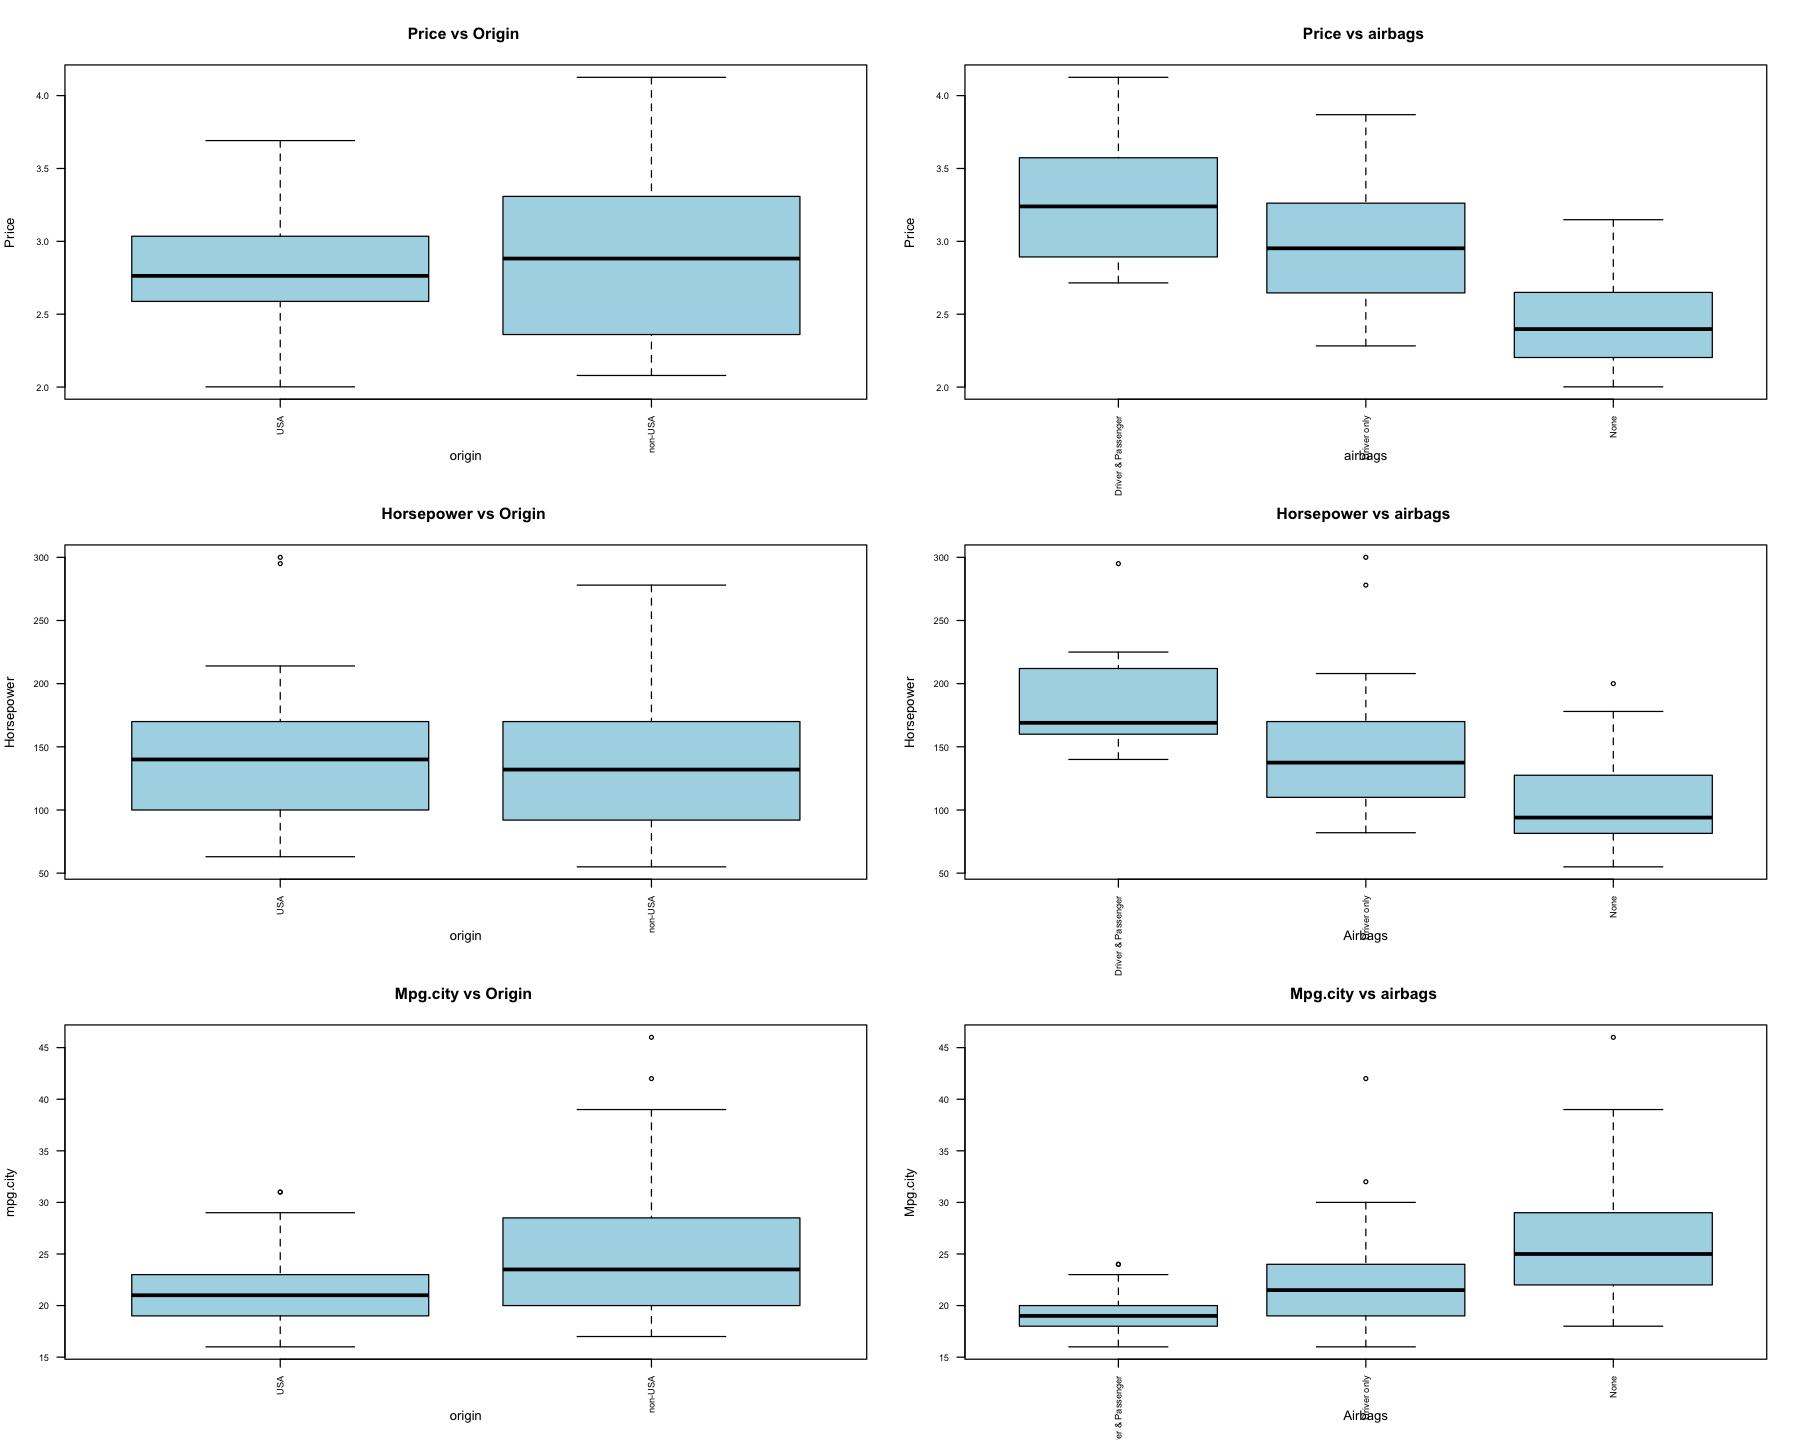

In [25]:
## plot con tutte le variabili in funzione di y per vedere eventuale relazione

##plot per verificare eventuali interazioni, nel caso di variabili di tipo YES/NO o livelli o classe insomme
par(mfrow=c(2,2))
options(repr.plot.width = 15, repr.plot.height = 10)

plot(mydata$Horsepower, mydata$Price, pch=19,cex.lab=1.2, xlab='horsepower', ylab='price',col=mydata$Origin)
legend('bottomright', col=c(1,2), pch=c(19,19),
        legend=c('origin==non-USA','origin==USA'))


plot(mydata$Horsepower, mydata$Price,pch=19, cex.lab=1.2, xlab='horsepower', ylab='price',col=mydata$AirBags)
legend('bottomright', col=c(1,2,3), pch=c(19,19,19),
        legend=c('airbags==Driver only','airbags==Driver & passenger','airbags==None'))


plot(mydata$MPG.city, mydata$Price,pch=19, cex.lab=1.2, xlab='MPG.city', ylab='price',col=mydata$Origin)
legend('bottomright', col=c(1,2), pch=c(19,19),
        legend=c('origin==non-USA','origin==USA'))


plot(mydata$MPG.city, mydata$Price, pch=19,cex.lab=1.2, xlab='MPG.city', ylab='price',col=mydata$AirBags)
legend('right', col=c(1,2,3), pch=c(19,19,19),
        legend=c('airbags==Driver only','airbags==Driver & passenger','airbags==None'))



par(mfrow=c(3,2))
options(repr.plot.width = 15, repr.plot.height = 12)
## plot boxplot per eventuali iterazioni (basati pero sempre su quello sopra)
boxplot(mydata$Price~ mydata$Origin, las=2, cex.axis=0.7,col="lightblue",xlab="origin",
ylab='Price', main='Price vs Origin ')
boxplot(mydata$Price~ mydata$AirBags, las=2, cex.axis=0.7,col="lightblue",xlab="airbags",
ylab='Price', main='Price vs airbags ')
boxplot(mydata$Horsepower~ mydata$Origin, las=2, cex.axis=0.7,col="lightblue",xlab="origin",
ylab='Horsepower', main='Horsepower vs Origin ')
boxplot(mydata$Horsepower~ mydata$AirBags, las=2, cex.axis=0.7,col="lightblue",xlab="Airbags",
ylab='Horsepower', main='Horsepower vs airbags ')
boxplot(mydata$MPG.city~ mydata$Origin, las=2, cex.axis=0.7,col="lightblue",xlab="origin",
ylab='mpg.city', main='Mpg.city vs Origin ')
boxplot(mydata$MPG~ mydata$AirBags, las=2, cex.axis=0.7,col="lightblue",xlab="Airbags",
ylab='Mpg.city', main='Mpg.city vs airbags ')




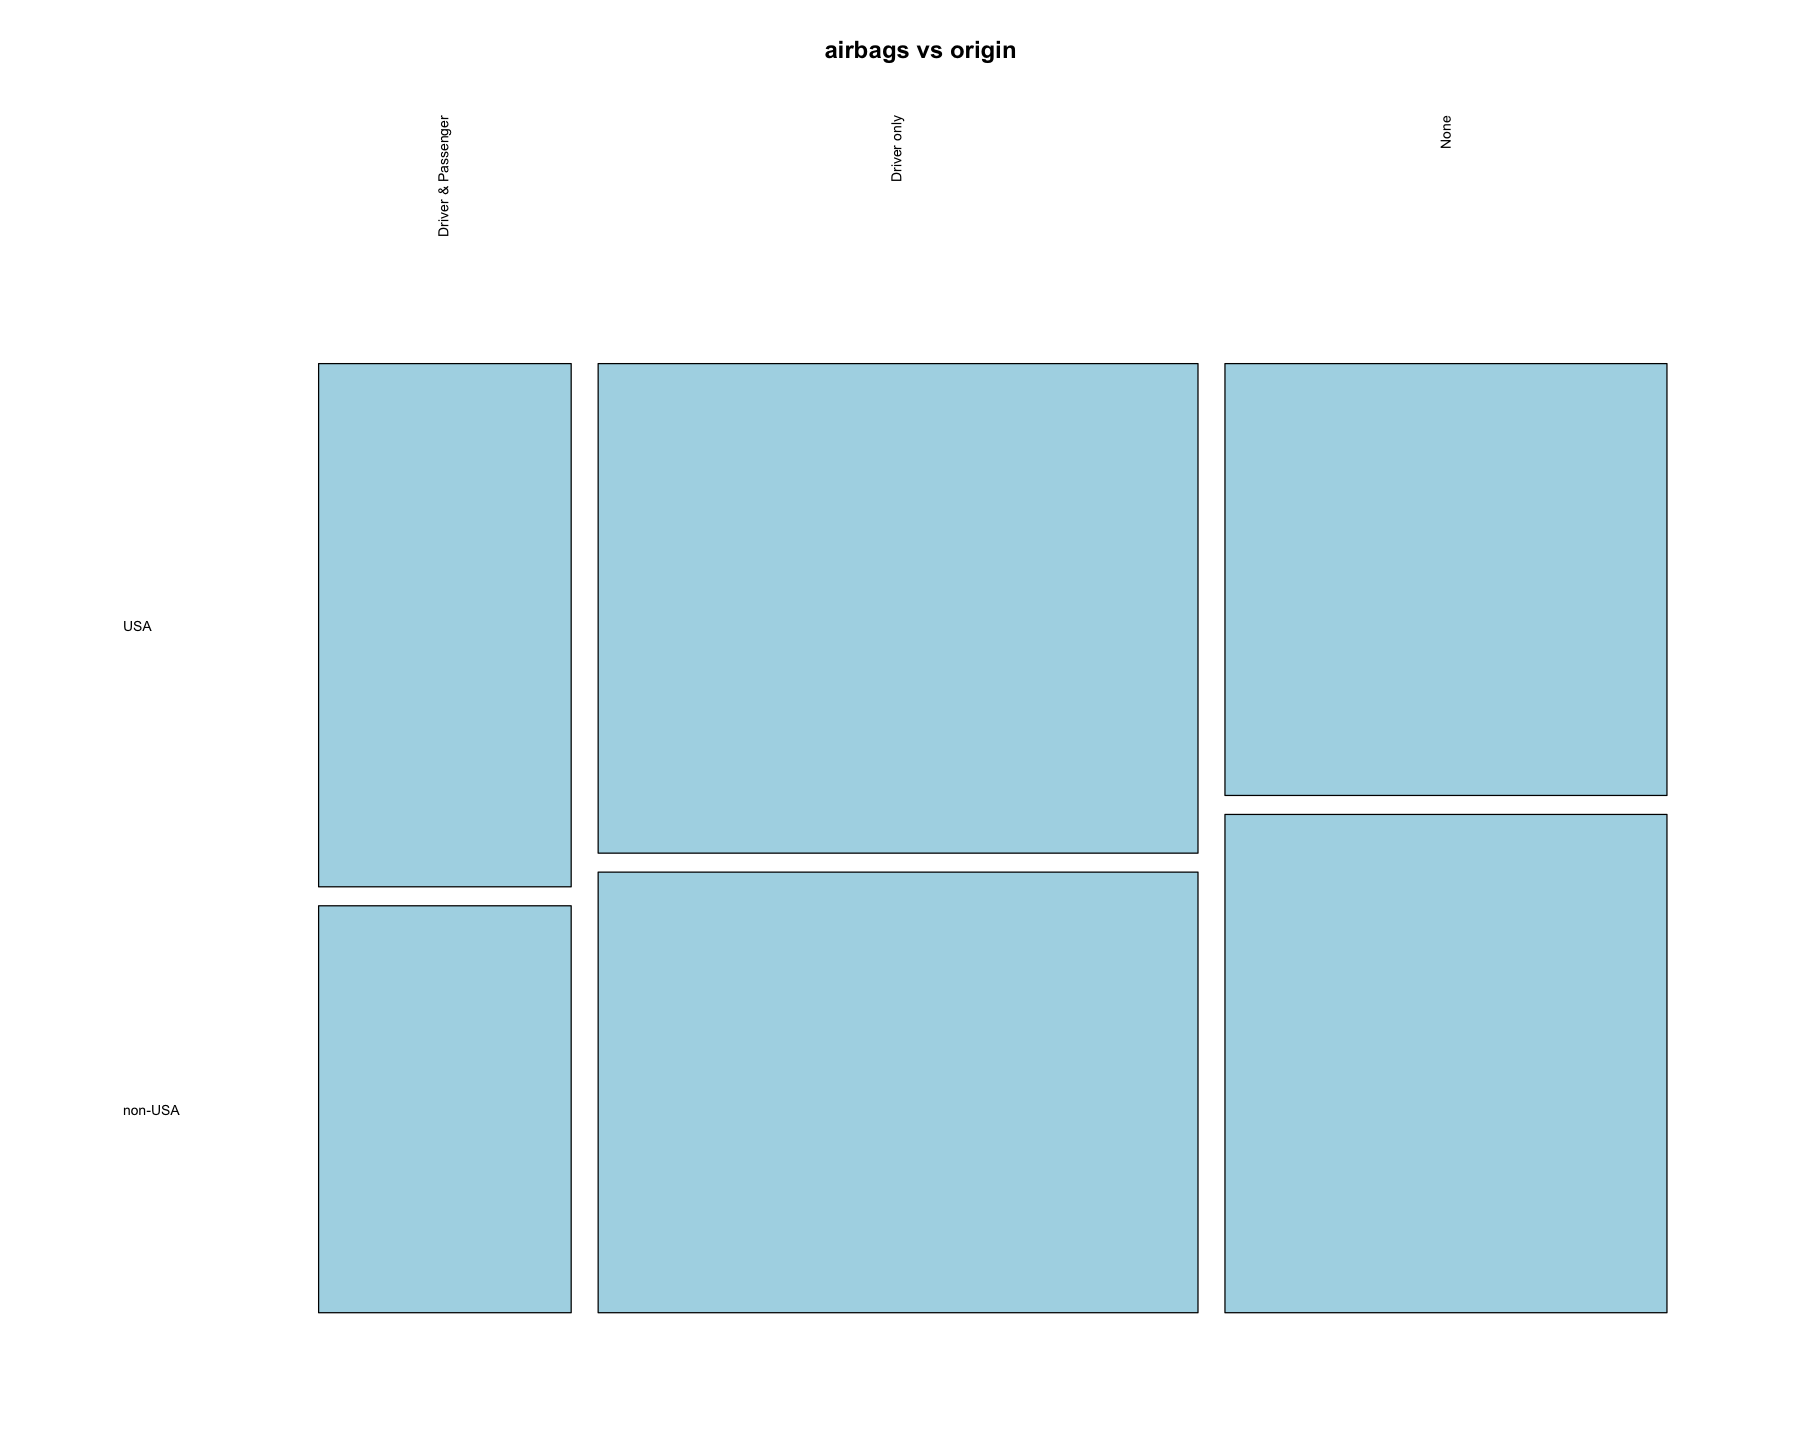

In [24]:
## plot moasic plot
mosaicplot(table(mydata$AirBags,mydata$Origin), las=2, cex.axis=0.7,col="lightblue",
xlab='', main='airbags vs origin ')

### Multiple Linear Regression

After this preliminary analysis we can apply a linear regression. Let's start with a model with all variables and interactions and then perform model selection base ond $P-value$.

So I started with a model including also the interactions between the covariates then the final model I have obtained is the following output .
In the table below the 95% CI for coefficients is reported.

In [36]:
model.mydata <- lm(Price~Horsepower*Origin + Horsepower*AirBags + Horsepower*MPG.city+ AirBags*MPG.city + Origin*MPG.city+Origin*AirBags, data=mydata)
#summary(model.mydata)

## rimuovere interazione non significativa (P-value più alto), ad esempio quella tra x1 e x4. 
model.mydata2 <- update(model.mydata, .~.-Horsepower:MPG.city-Horsepower:AirBags)



#summary(model.mydata3)
model.mydata3 <- update(model.mydata2, .~.-Origin:AirBags)



#summary(model.mydata3)
model.mydata4 <- update(model.mydata3, .~.-Origin:MPG.city)

summary(model.mydata4)
confint(model.mydata4)


Call:
lm(formula = Price ~ Horsepower + Origin + AirBags + MPG.city + 
    Horsepower:Origin + AirBags:MPG.city, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39499 -0.11102 -0.01388  0.09679  0.46957 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  4.1685575  0.5165479   8.070 1.04e-11 ***
Horsepower                   0.0029973  0.0007346   4.080 0.000114 ***
Originnon-USA               -0.1810797  0.1380565  -1.312 0.193754    
AirBagsDriver only          -1.0298488  0.4640052  -2.219 0.029561 *  
AirBagsNone                 -1.6581393  0.4818969  -3.441 0.000963 ***
MPG.city                    -0.0809710  0.0234453  -3.454 0.000924 ***
Horsepower:Originnon-USA     0.0025645  0.0009021   2.843 0.005794 ** 
AirBagsDriver only:MPG.city  0.0486987  0.0231403   2.104 0.038778 *  
AirBagsNone:MPG.city         0.0646503  0.0234065   2.762 0.007262 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.0

2.5 %         97.5 %      
(Intercept)                  3.1390791180  5.198035893
Horsepower                   0.0015332770  0.004461398
Originnon-USA               -0.4562258132  0.094066511
AirBagsDriver only          -1.9546097910 -0.105087831
AirBagsNone                 -2.6185584850 -0.697720179
MPG.city                    -0.1276973290 -0.034244678
Horsepower:Originnon-USA     0.0007666756  0.004362361
AirBagsDriver only:MPG.city  0.0025801549  0.094817326
AirBagsNone:MPG.city         0.0180012715  0.111299298

This choice is also justify by considering the $F-statistic$, in fact we can see it from the following output:

In [37]:
anova(model.mydata,model.mydata4)

Res.Df RSS      Df Sum of Sq F        Pr(>F)   
1 67     2.387982 NA        NA       NA        NA
2 73     2.755480 -6 -0.367497 1.718487 0.1302055

If we try with a polynomial in Mpg and Horsepower and select based on p-value  we obtain the following output, so is useful to insert a polynomial term for MPG:

In [44]:
model.mydata6<-update(model.mydata4, .~.+I(MPG.city^2)-AirBags:MPG.city-AirBags)
summary(model.mydata6)


Call:
lm(formula = Price ~ Horsepower + Origin + MPG.city + I(MPG.city^2) + 
    Horsepower:Origin, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.53638 -0.14099  0.00122  0.09631  0.54039 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               4.8122226  0.5370717   8.960 1.59e-13 ***
Horsepower                0.0026139  0.0008431   3.100  0.00271 ** 
Originnon-USA            -0.2699330  0.1458501  -1.851  0.06809 .  
MPG.city                 -0.1587770  0.0320985  -4.947 4.41e-06 ***
I(MPG.city^2)             0.0022068  0.0005207   4.238 6.27e-05 ***
Horsepower:Originnon-USA  0.0032062  0.0009537   3.362  0.00121 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2059 on 76 degrees of freedom
Multiple R-squared:  0.8196,	Adjusted R-squared:  0.8077 
F-statistic: 69.06 on 5 and 76 DF,  p-value: < 2.2e-16


This choice is also justify by considering the $F-statistic$, in fact we can see it from the following output that it is justifiable the passage to a model with polynomial term. It also allows to remove some variables from the previous model always based on $p-value$ :

In [45]:
anova(model.mydata4,model.mydata6)

Res.Df RSS      Df Sum of Sq  F        Pr(>F)    
1 73     2.755480 NA         NA       NA         NA
2 76     3.220926 -3 -0.4654465 4.110307 0.00943684

Now we can judge also our model considering the residuals. 
The graph of residuals indicates that the model does  have a good fit. In fact, the first graph (scatter plot of the residuals) doesn't show a deterministic pattern e. In addition, the mean of the residuals does  appear to be 0 and the variance of the residuals does  appear to be constant, as it should be based on the assumptions that the regression model places on the ε errors. Furthermore, the normality of the residuals is  satisfied  as highlighted in the second graph: the empirical quantiles, in fact, don't deviate from the theoretical quantiles of a standard normal.
To complete the analysis of the residuals, no outliers appear to be present: although R highlights observations, these do not represent outlier observations since Cook's distance is not large.


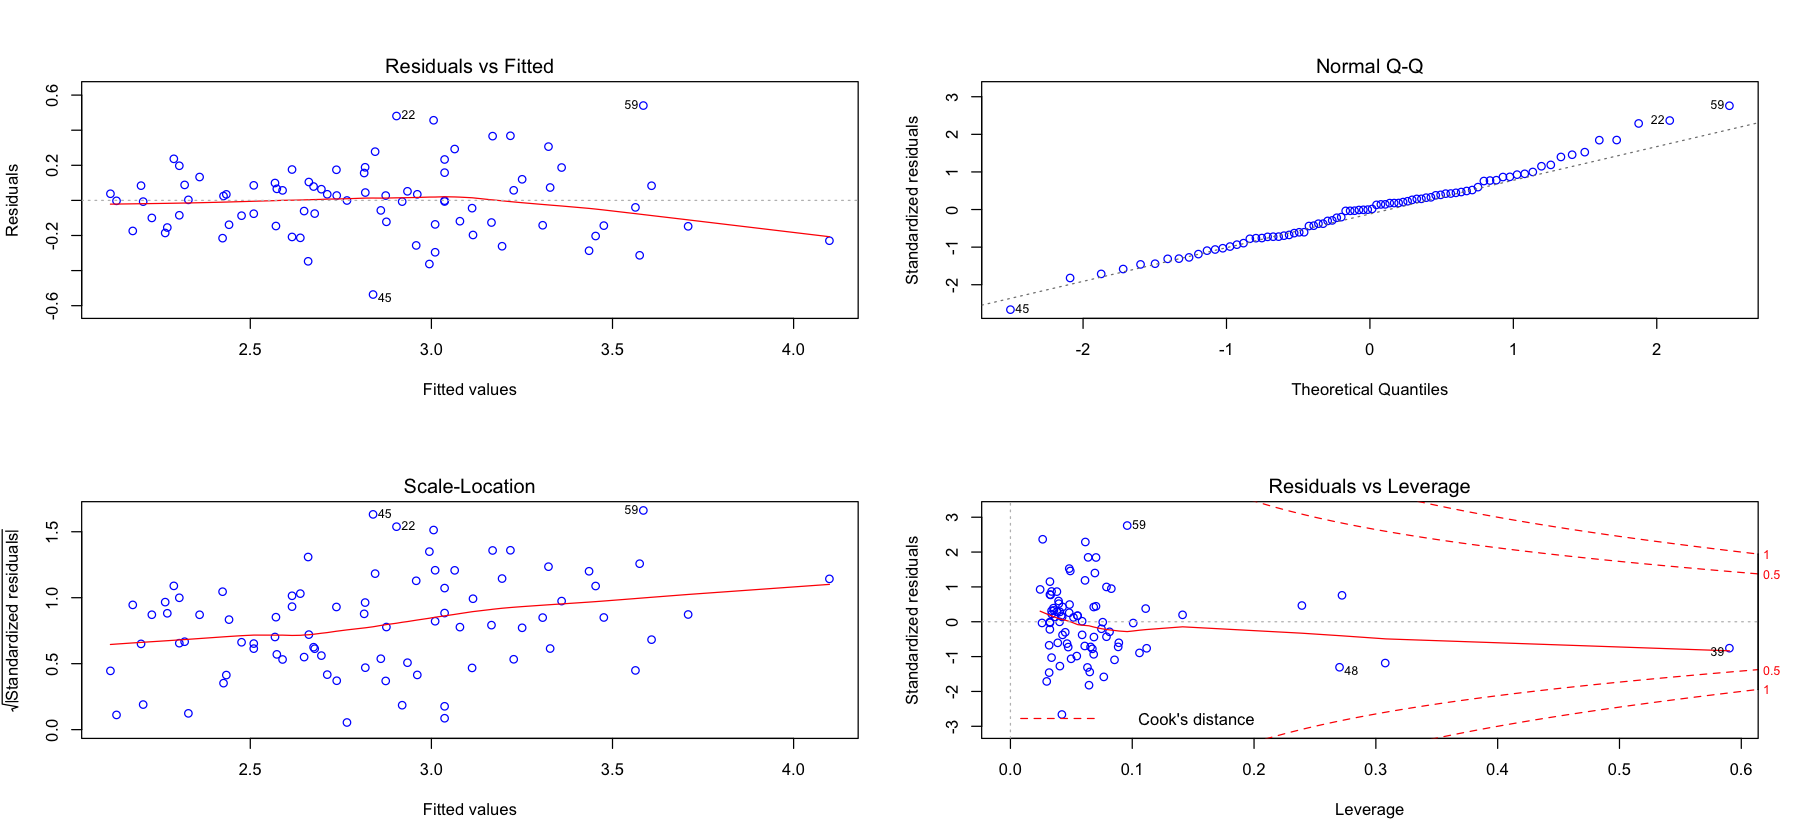

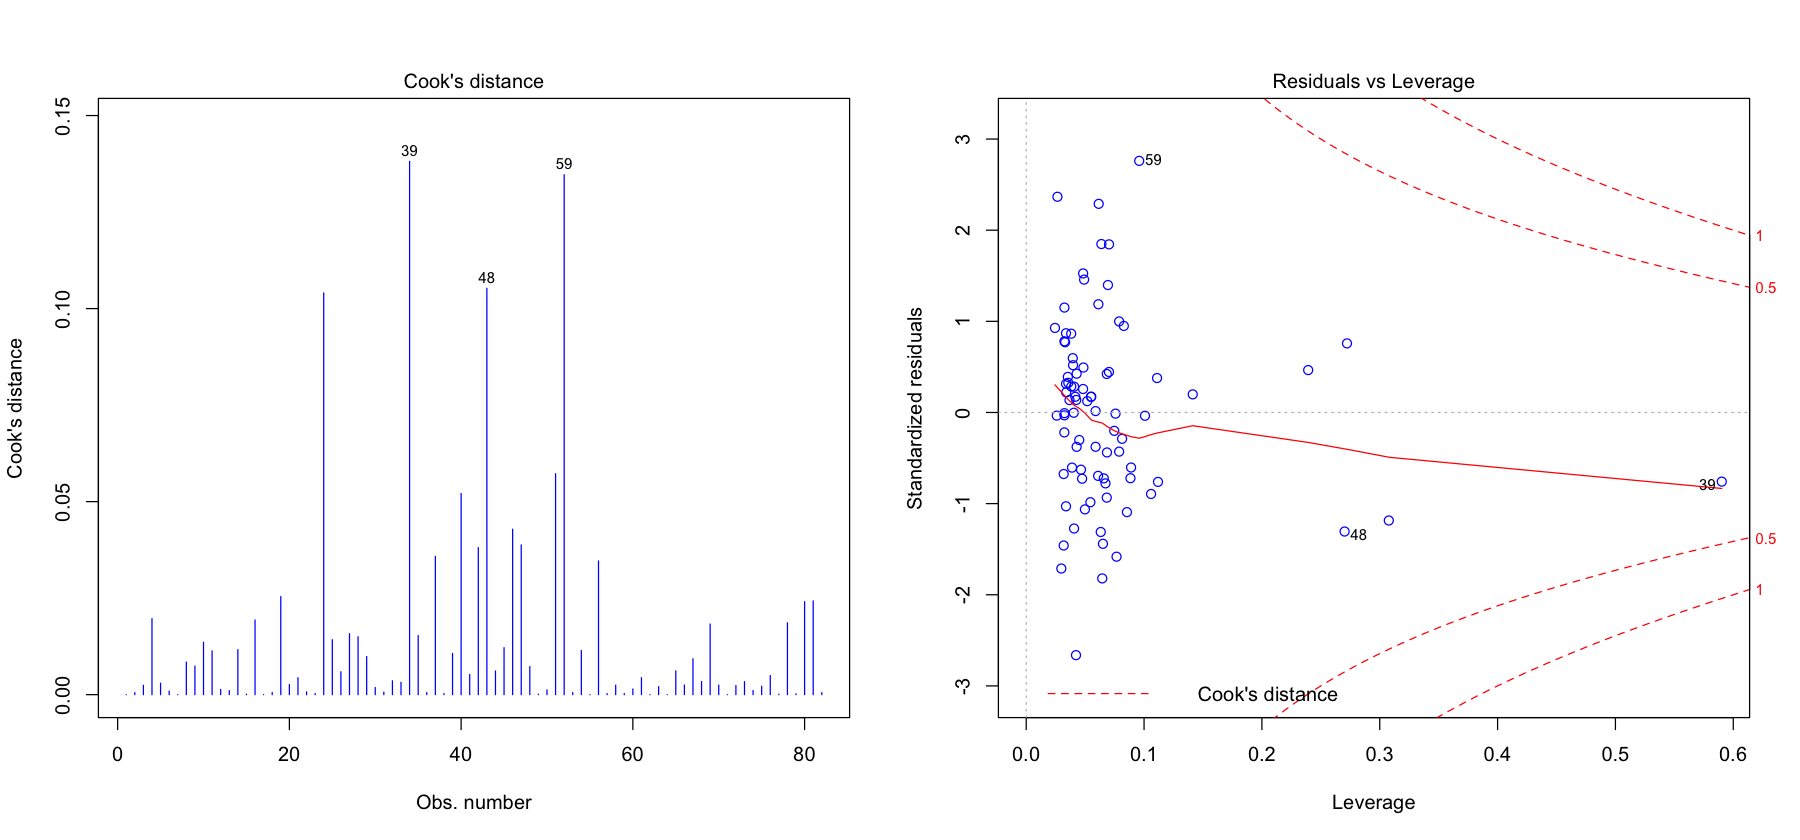

In [46]:
# subdivide the window into 4 parts, 2 rows and 2 columns , residul plot
par(mfrow=c(2,2))
options(repr.plot.width = 15, repr.plot.height = 7)
plot(model.mydata6,col="blue")
### plot the Cook's distance
par(mfrow=c(1,2))
plot(model.mydata6, 4,col="blue")
plot(model.mydata6, 5,col="blue")

### GAM
Now let's use the smoothing splines for the variables that are not linear. In order to find the degrees of freedom I have used the cross validation. I set the seed at 111. From the following plot ( I tried also with just splines for Horsepower and just for MPG) we see that smoothing spinlines are not useful. So the final model is the one obtained before.

In [48]:
set.seed(111)
library(gam)
## CONSIDERA LE VARIABILI NON LINEARI
x1.cv = smooth.spline(x= mydata$Horsepower, y=mydata$pPrice, cv=TRUE)
x1.cv 
x2.cv = smooth.spline(x= mydata$MPG.city, y=mydata$Price, cv=TRUE)
x2.cv 


## primo fit considerando le variabili splines smooth
m.gam <- gam(Price ~ s(Horsepower,4) + Origin + s(MPG.city,4) + I(MPG.city^2) + 
    s(Horsepower,4):Origin,
#+s(x5, degree of freedoms find before)*x6 (se hai interazione)
#altre variabili del best model,
data=mydata)
summary(m.gam)

Call:
smooth.spline(x = mydata$Horsepower, y = mydata$pPrice, cv = TRUE)

Smoothing Parameter  spar= 0.8791004  lambda= 0.01175602 (13 iterations)
Equivalent Degrees of Freedom (Df): 4.259636
Penalized Criterion (RSS): 189995.3
PRESS(l.o.o. CV): 2552.605

Warning message in smooth.spline(x = mydata$MPG.city, y = mydata$Price, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”

Call:
smooth.spline(x = mydata$MPG.city, y = mydata$Price, cv = TRUE)

Smoothing Parameter  spar= 0.6725017  lambda= 0.01109883 (14 iterations)
Equivalent Degrees of Freedom (Df): 3.872711
Penalized Criterion (RSS): 0.635975
PRESS(l.o.o. CV): 0.0776602

Warning message in model.matrix.default(mt, mf, contrasts):
“non-list contrasts argument ignored”


Call: gam(formula = Price ~ s(Horsepower, 4) + Origin + s(MPG.city, 
    4) + I(MPG.city^2) + s(Horsepower, 4):Origin, data = mydata)
Deviance Residuals:
      Min        1Q    Median        3Q       Max 
-0.545842 -0.114849 -0.002327  0.113068  0.530683 

(Dispersion Parameter for gaussian family taken to be 0.0427)

    Null Deviance: 17.8554 on 81 degrees of freedom
Residual Deviance: 2.9873 on 70.0002 degrees of freedom
AIC: -12.9064 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                        Df  Sum Sq Mean Sq  F value    Pr(>F)    
s(Horsepower, 4)         1 11.9196 11.9196 279.3055 < 2.2e-16 ***
Origin                   1  0.1516  0.1516   3.5518 0.0636338 .  
s(MPG.city, 4)           1  0.6947  0.6947  16.2783 0.0001377 ***
I(MPG.city^2)            1  0.4945  0.4945  11.5879 0.0011021 ** 
s(Horsepower, 4):Origin  1  0.4436  0.4436  10.3936 0.0019220 ** 
Residuals               70  2.9873  0.0427                       
---
Signif. codes:  0 ‘*

# Conclusion Point 1

We have obtained that the best model is:

$ Price = 4.81+ 0.003*Horsepower -0.27*Origin_{I=non USA} -0.16 *MPG.city + 0.0022*MPG.city^2 +  0.003*Horsepower*Origin_{I=non USA} $

In the following plot  there are the  predictions based on the best model.

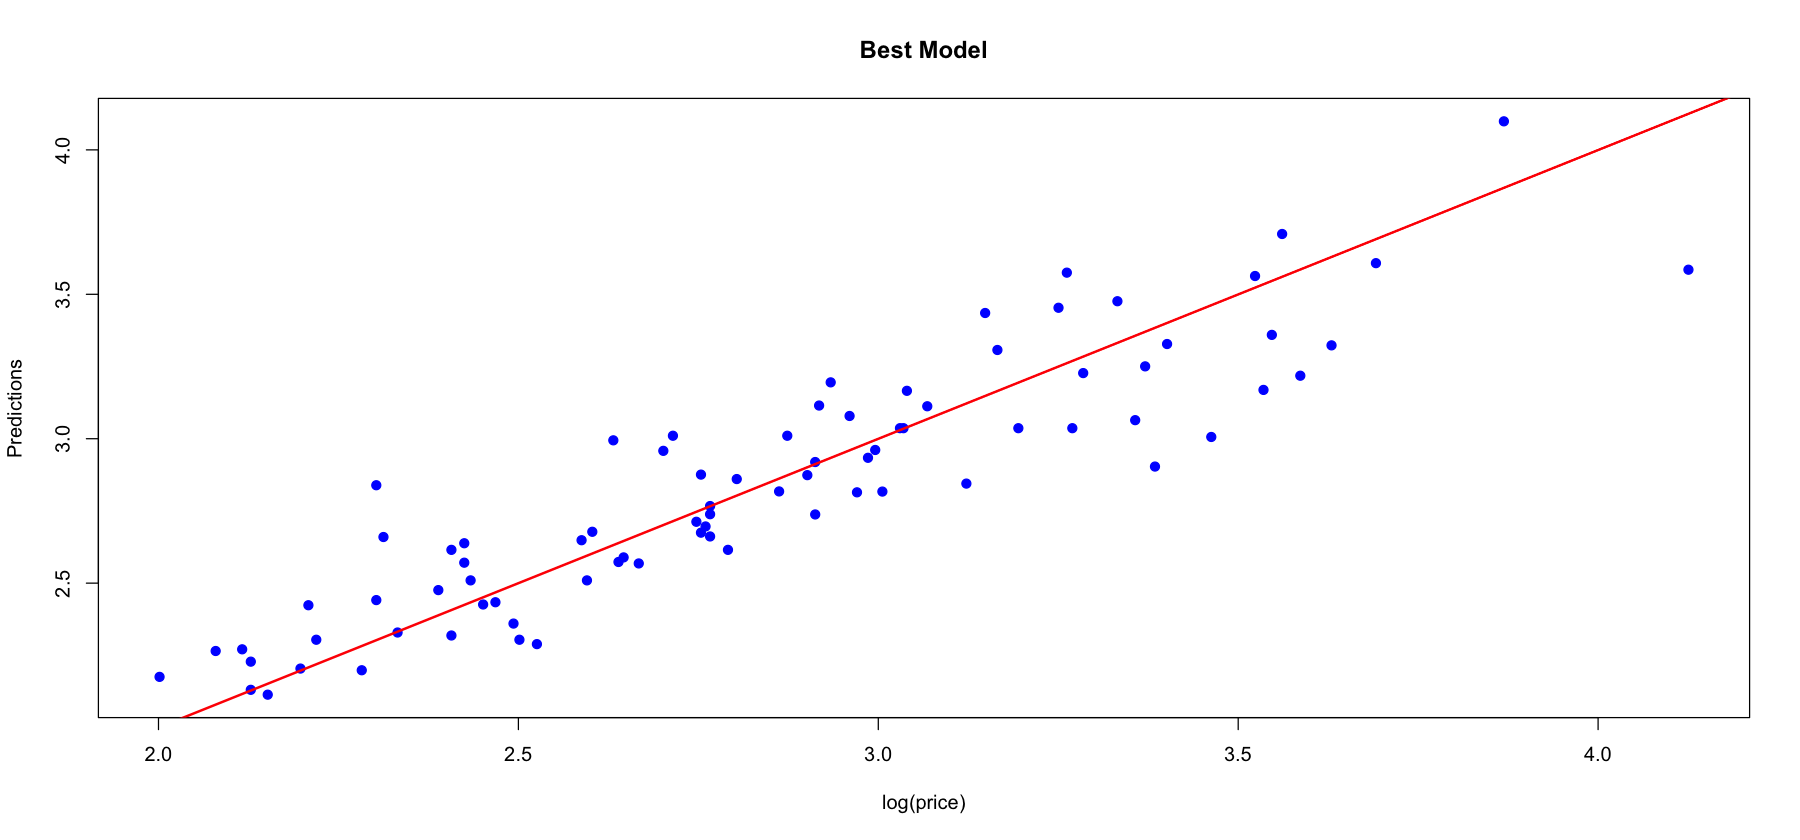

In [54]:
### plot prediction

plot(mydata$Price, predict(model.mydata6), xlab='log(price)', ylab='Predictions',
       pch=19, main='Best Model',col="blue")
abline(0, 1, col='red', lwd=2)

### RIDGE
Let's consider all the dataset and perform a ridge regression with also the quadratic and interaction term obtained before. Again I will refer to price variable as log(price) in the following analysis.

In [63]:
load("cars.RData")
mydata<-cars

summary(mydata)
library(glmnet)
mydata$Price<-log((mydata$Price))

y <-  mydata$Price
X <- model.matrix(Price ~ .+I(MPG.city^2) +  Horsepower:Origin, data=mydata)[,-1]
m.ridge <- glmnet(X, y, alpha=0)


      Type        Price          MPG.city      MPG.highway   
 Compact:16   Min.   : 7.40   Min.   :16.00   Min.   :22.00  
 Large  :11   1st Qu.:11.65   1st Qu.:19.00   1st Qu.:26.00  
 Midsize:22   Median :16.10   Median :22.00   Median :29.00  
 Small  :21   Mean   :19.17   Mean   :23.09   Mean   :29.98  
 Sporty :12   3rd Qu.:23.60   3rd Qu.:25.00   3rd Qu.:32.75  
 Van    : 0   Max.   :61.90   Max.   :46.00   Max.   :50.00  
               AirBags   DriveTrain  Cylinders    EngineSize      Horsepower   
 Driver & Passenger:16   4WD  : 5   3     : 3   Min.   :1.000   Min.   : 55.0  
 Driver only       :38   Front:63   4     :48   1st Qu.:1.800   1st Qu.:100.0  
 None              :28   Rear :14   5     : 1   Median :2.300   Median :134.5  
                                    6     :24   Mean   :2.589   Mean   :140.0  
                                    8     : 6   3rd Qu.:3.200   3rd Qu.:170.0  
                                    rotary: 0   Max.   :5.700   Max.   :300.0  
      

Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that  31  over the graph indicate the number of covariates entering the model as  $ \lambda$ varies: 31 is repeated, as ridge regression is not a selection method.

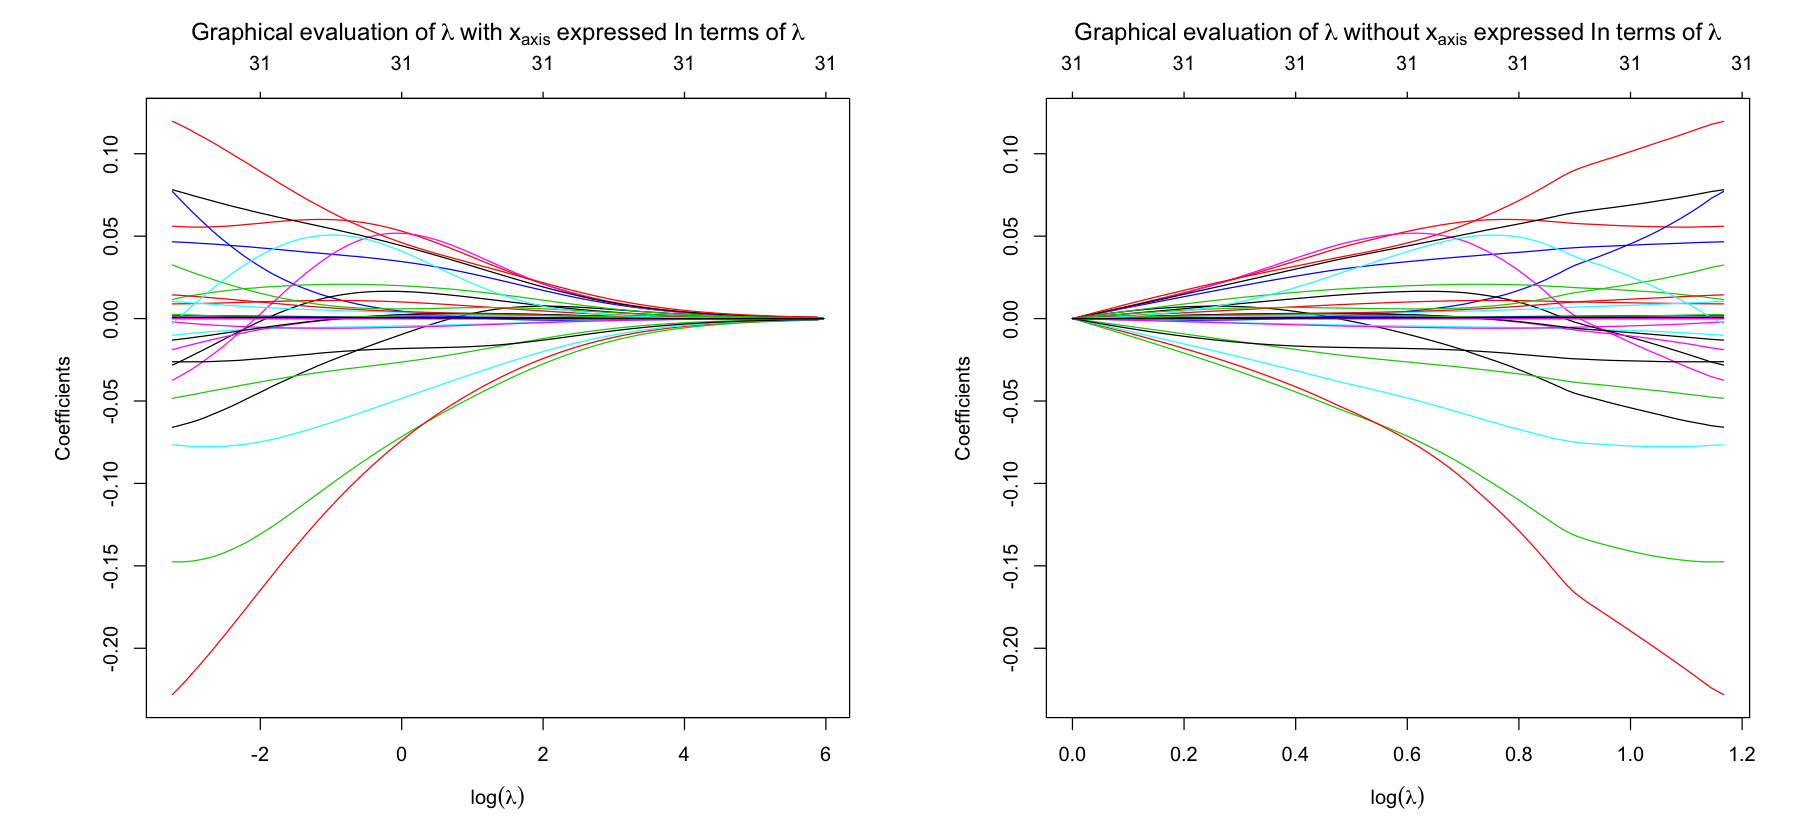

In [61]:
## plot graphical evaluation

options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.ridge, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.ridge, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

Now let's look for the best $\lambda$ using cross validation.
The plot below shows the values of $cvm$ for each $log(\lambda)$ together with the associated confidence interval. The two dashed lines are the values of minimun $log(\lambda)$  and $log(\lambda)$ $1 \sigma$ far from the minimum. \
So the best $\lambda$  from cross validation is: 0.11 \
And the MSE is: 0.045

[1] 0.1086438

[1] 0.044701

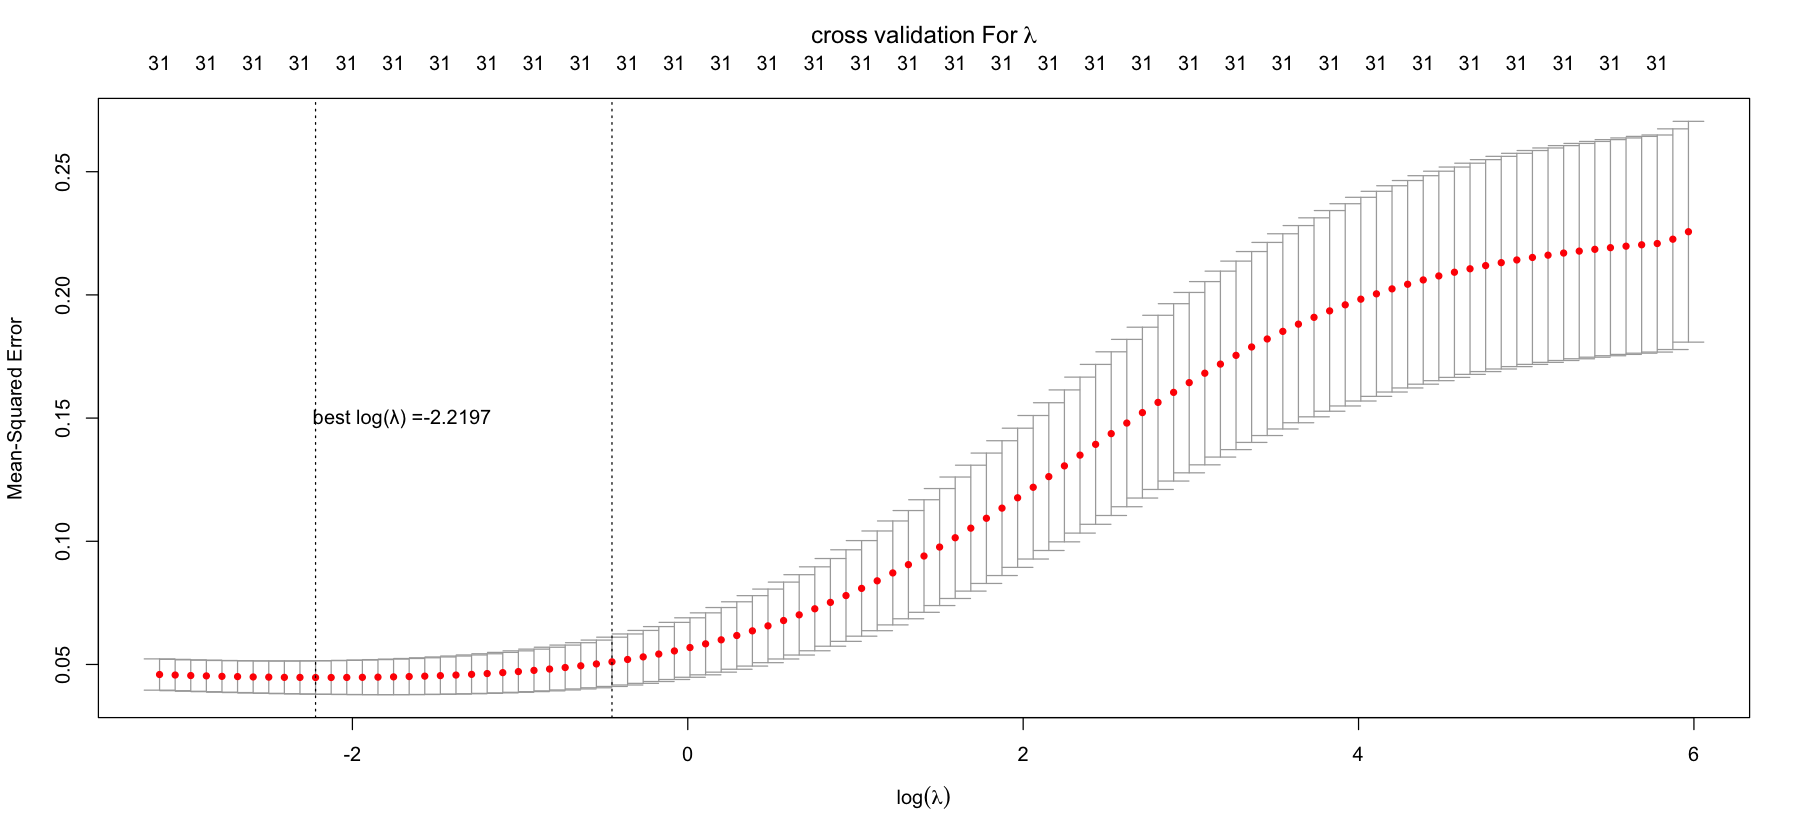

In [66]:
### cross validation plot

set.seed(2906)
options(warn=-1)
cv.ridge <- cv.glmnet(X, y, alpha=0)
plot(cv.ridge, xlab=expression(log(lambda)))
text(x=log(cv.ridge$lambda.min)+0.5, y=0.15, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.ridge$lambda.min
best.lambda

mse<-min(cv.ridge$cvm)
mse

Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to:0.88

[1] 0.8821507

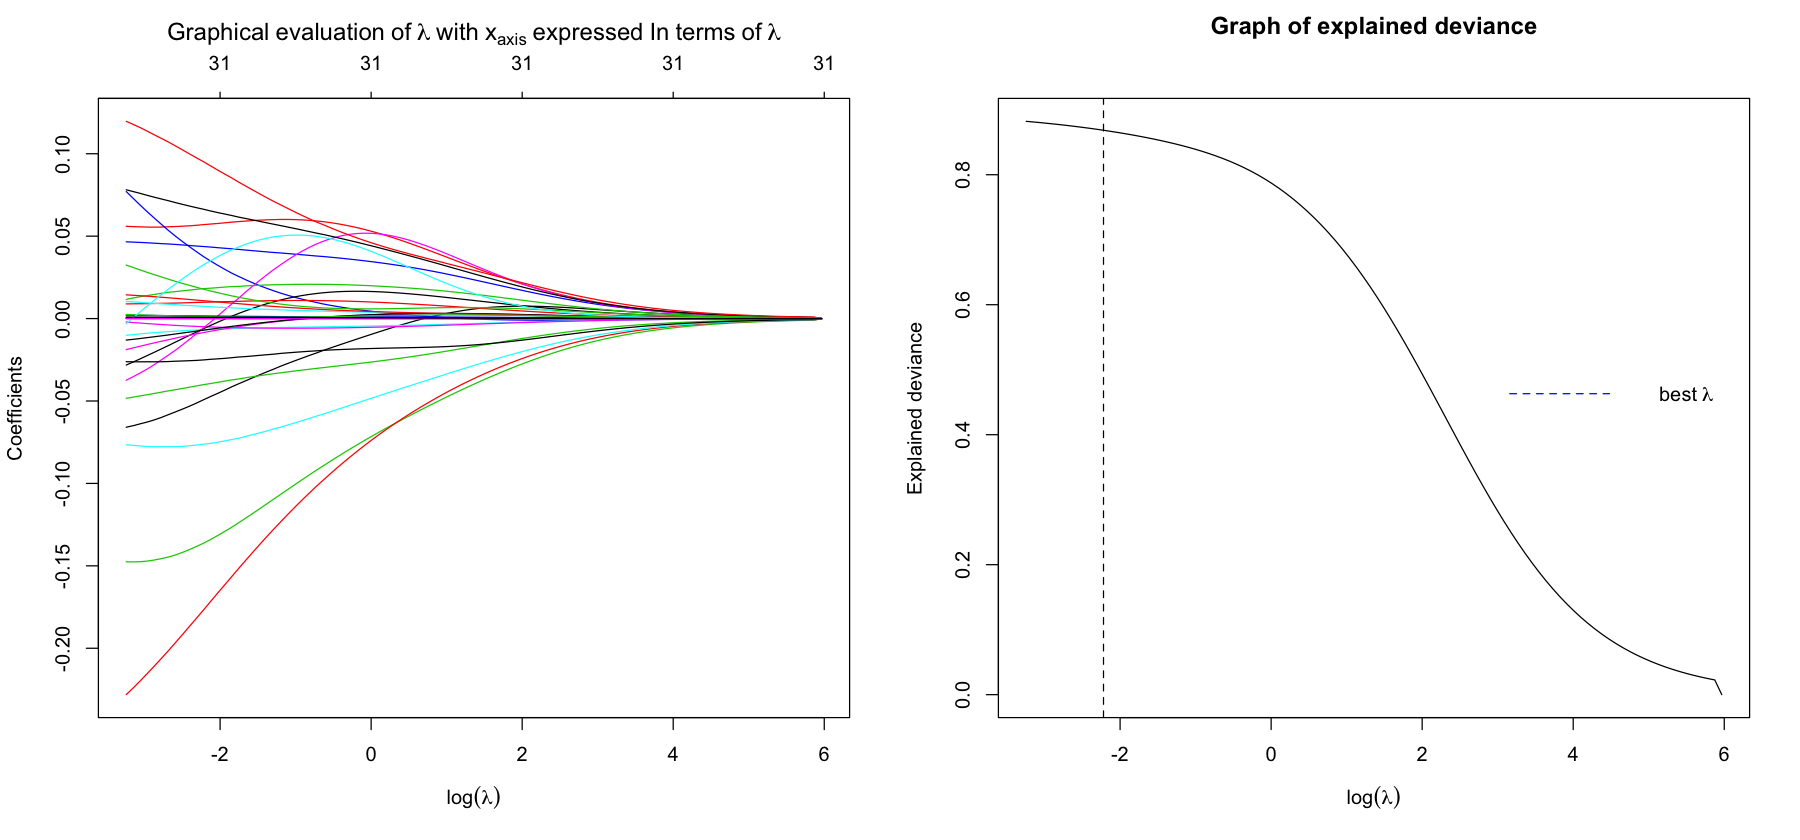

In [69]:
#### best model

m.ridge.min <- glmnet(X, y, alpha=0, lambda=best.lambda)


par(mfrow=c(1,2))
plot(m.ridge, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.ridge$lambda), m.ridge$dev.ratio, type='l',
       xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,color="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = 2.5,bty="n", y=0.5)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.ridge$dev.ratio)

### LASSO

Let's perform the analysis usign lasso keeping the interacrtions and quadratic term. Above we can see the graphical evaluation of the coefficients associated to the covariates.
We see that the numbers over the graph indicate the number of covariates entering the model as  $ \lambda$ varies:31 is not repeated, as lasso regression is a selection method.


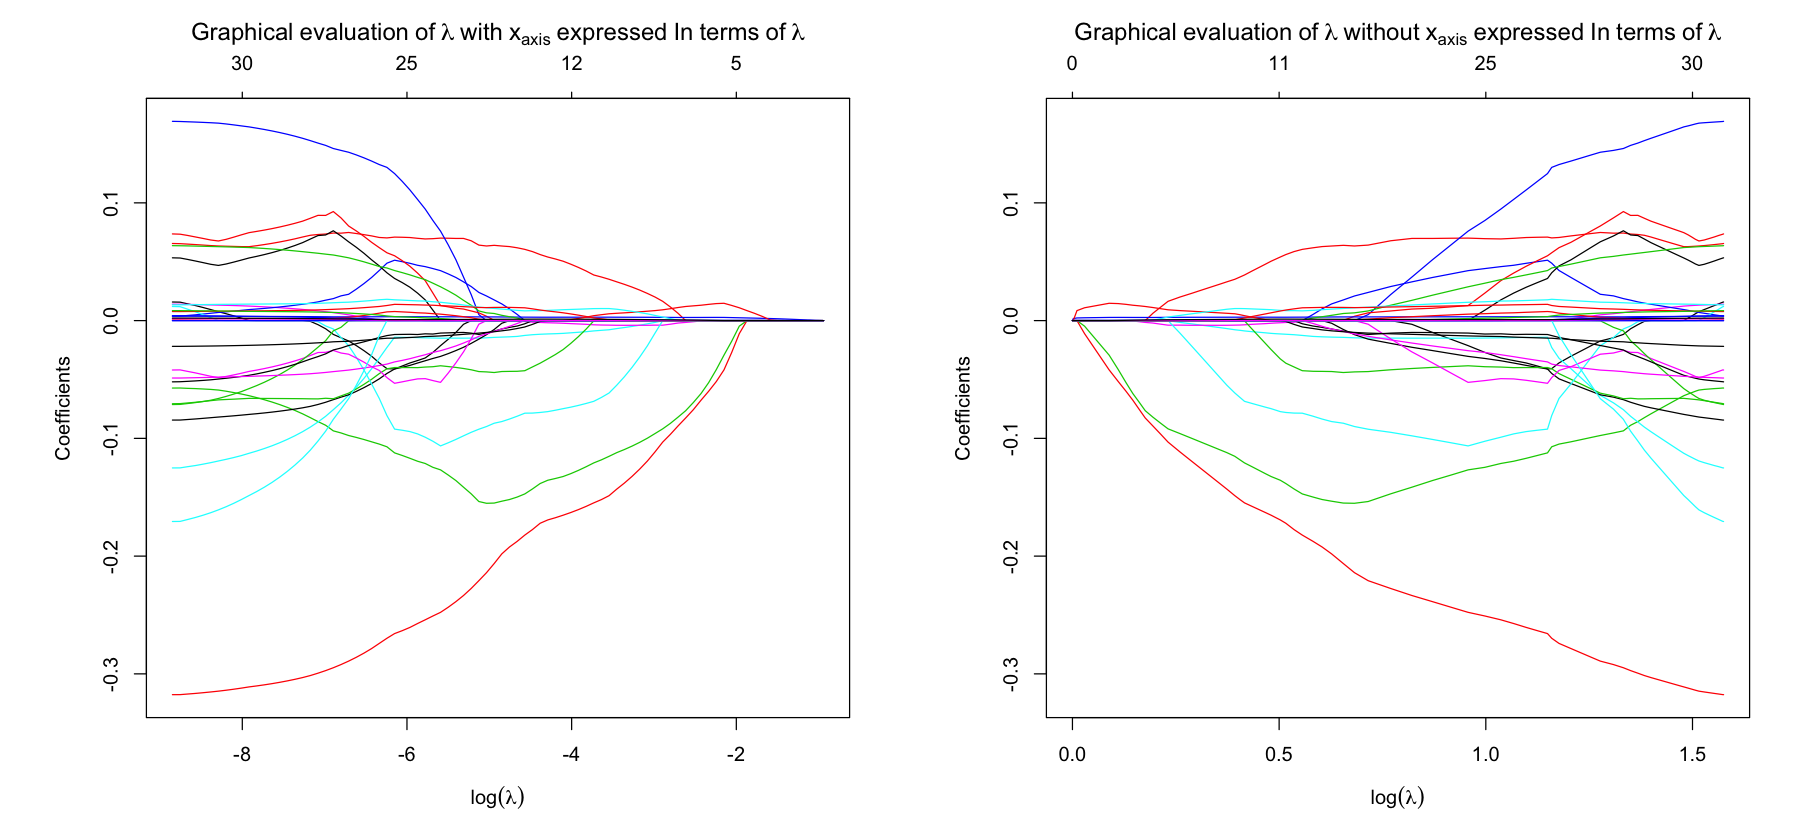

In [72]:
## lasso regression

library(glmnet)
m.lasso <- glmnet(X, y, alpha=1)
options(repr.plot.width = 15, repr.plot.height = 7)
par(mar = c(5.1, 6.1, 4.1, 2.1))
    par(mfrow=c(1,2))

plot(m.lasso, xvar='lambda', xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)
plot(m.lasso, xlab=expression(log(lambda)))
title(expression(Graphical ~ evaluation ~of~ symbol(l)~without~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)


Now let's look for the best $\lambda$ using cross validation.
So the best $\lambda$  from cross validation is: 0.015 \
And the MSE is: 0.45

[1] 0.01504593

[1] 0.04542089

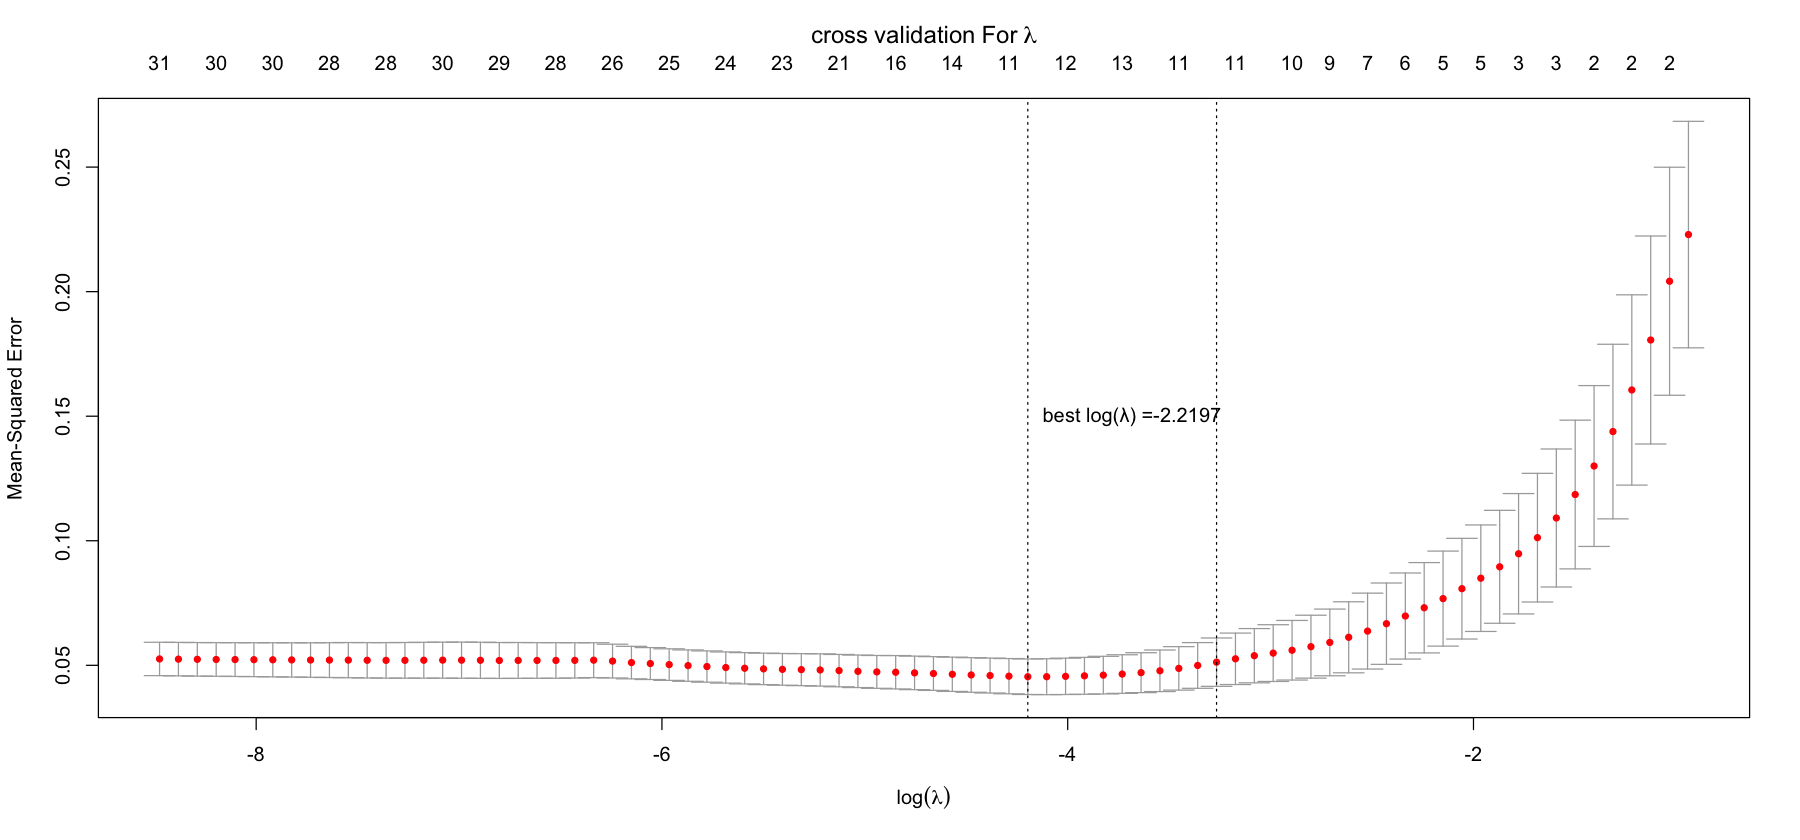

In [74]:
set.seed(2906)
options(warn=-1)
cv.lasso <- cv.glmnet(X, y, alpha=1)
plot(cv.lasso, xlab=expression(log(lambda)))
text(x=log(cv.lasso$lambda.min)+0.5, y=0.15, paste0(" best log(λ) =",round((log(cv.ridge$lambda.min)),4)))
title(expression(cross ~ validation ~For~ symbol(l)),line=2.7)

## best lambda and MSE

best.lambda <- cv.lasso$lambda.min
best.lambda

mse<-min(cv.lasso$cvm)
mse


On the basis of MSE , the model fitted with lasso is preferable. In addition, the resulting model with lasso is simplest.
Now we can Re-estimate the model using the best $\lambda$.
Below we seen the coefficients of the model, graphical representation of the coefficients for the best $\lambda$ and model deviance. \
The maximum explained deviance is obtained for the minimum (best) $\lambda$  and it is equal to: 0.9 \
Furthermore from the new coefficients we can see that some of the coefficients are zero, so the lasso performed a model selection. In particular the coefficients with a "dot" have been removed.


Call:  glmnet(x = X, y = y, alpha = 1, lambda = best.lambda) 

     Df   %Dev  Lambda
[1,] 11 0.8602 0.01505

34 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
(Intercept)               1.690478757
TypeLarge                 .          
TypeMidsize               0.052568553
TypeSmall                -0.133662850
TypeSporty                .          
TypeVan                   .          
MPG.city                 -0.011497153
MPG.highway              -0.001638707
AirBagsDriver only        .          
AirBagsNone              -0.167771203
DriveTrainFront          -0.028998448
DriveTrainRear            .          
Cylinders4               -0.076188393
Cylinders5                .          
Cylinders6                .          
Cylinders8                .          
Cylindersrotary           .          
EngineSize                .          
Horsepower                0.002892649
RPM                       .          
Rev.per.mile              .          
Man.trans.availYes        .          
Fuel.tank.capacity        .          
Passengers                .          
Length  

[1] 12

[1] 0.9053698

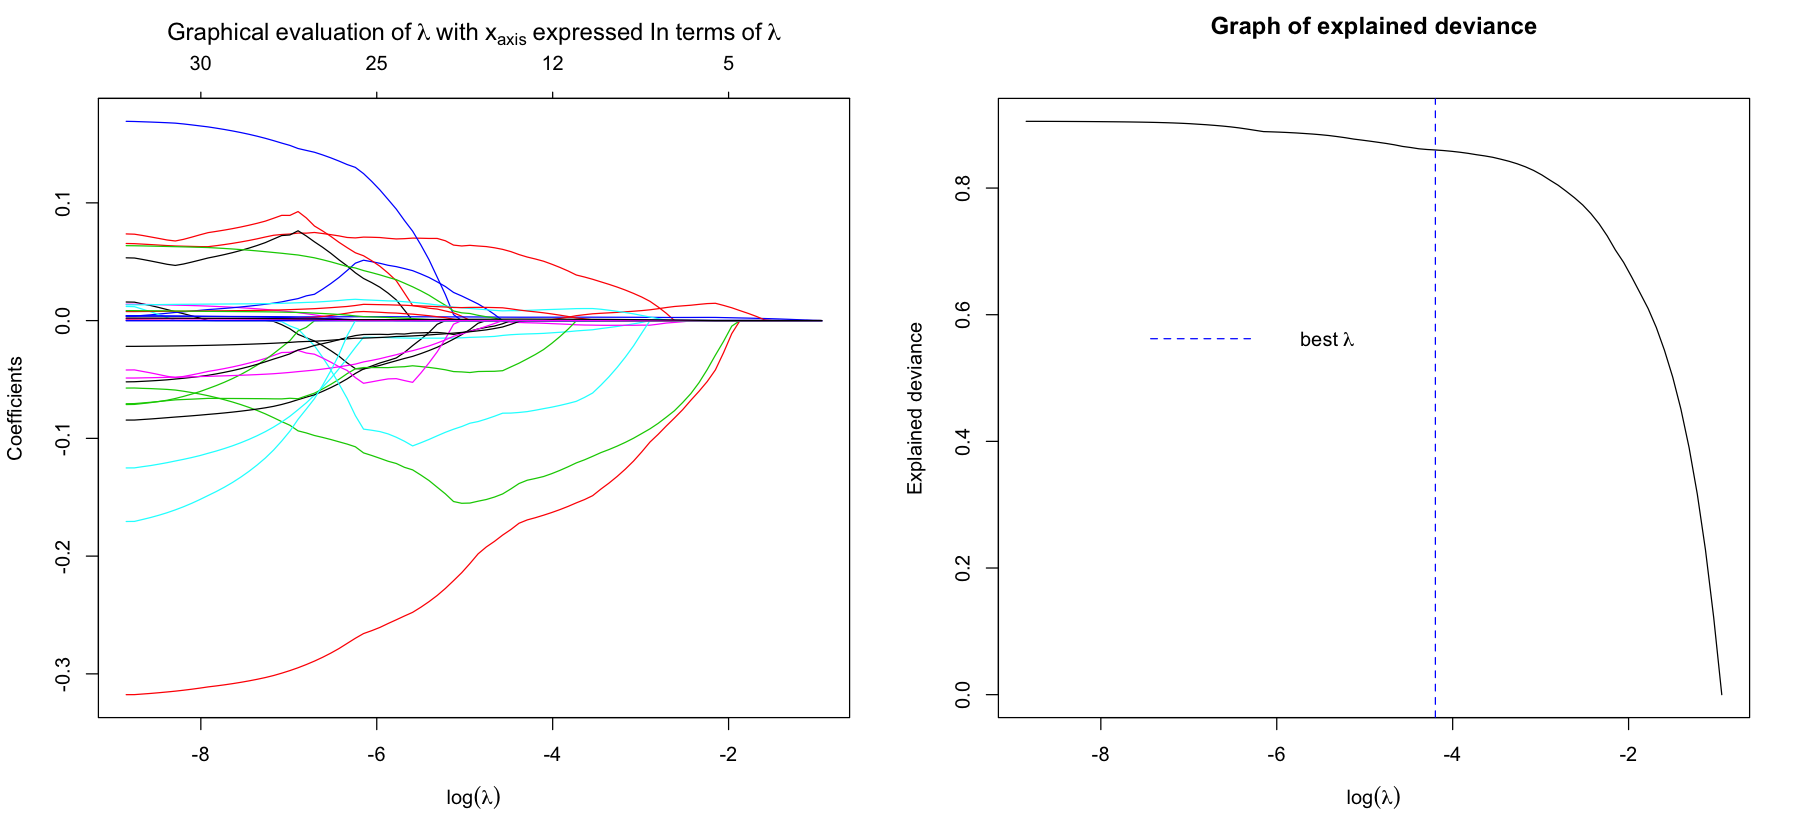

In [80]:
#### best model

m.lasso.min <- glmnet(X, y, alpha=1, lambda=best.lambda)
m.lasso.min
coef(m.lasso.min)

## number of coefficient diversi da 0

id.zero <- which(coef(m.lasso.min)==0)
nonzero <- length(coef(m.lasso.min))-length(id.zero)
nonzero



par(mfrow=c(1,2))
plot(m.lasso, xvar='lambda', xlab=expression(log(lambda))) ## add on the line corresponding to the best lambda abline(v=log(best.lambda), lty=2)
title(expression(Graphical ~ evaluation ~of~ symbol(l)~with~x[axis]~expressed~In~terms~of~symbol(l)),line=2.7)

## deviance
plot(log(m.lasso$lambda), m.lasso$dev.ratio, type='l',
        xlab=expression(log(lambda)), ylab='Explained deviance')
abline(v=log(best.lambda), lty=2,col="blue")
legend(legend = expression(best~ symbol(l)), col="blue",lt=2,x = -8,bty="n", y=0.6)
title ("Graph of explained deviance",line=2.7)


## maxi explained deviance
max(m.lasso$dev.ratio)

In the following plot there is the comparison of prediction  with lasso and ridge.

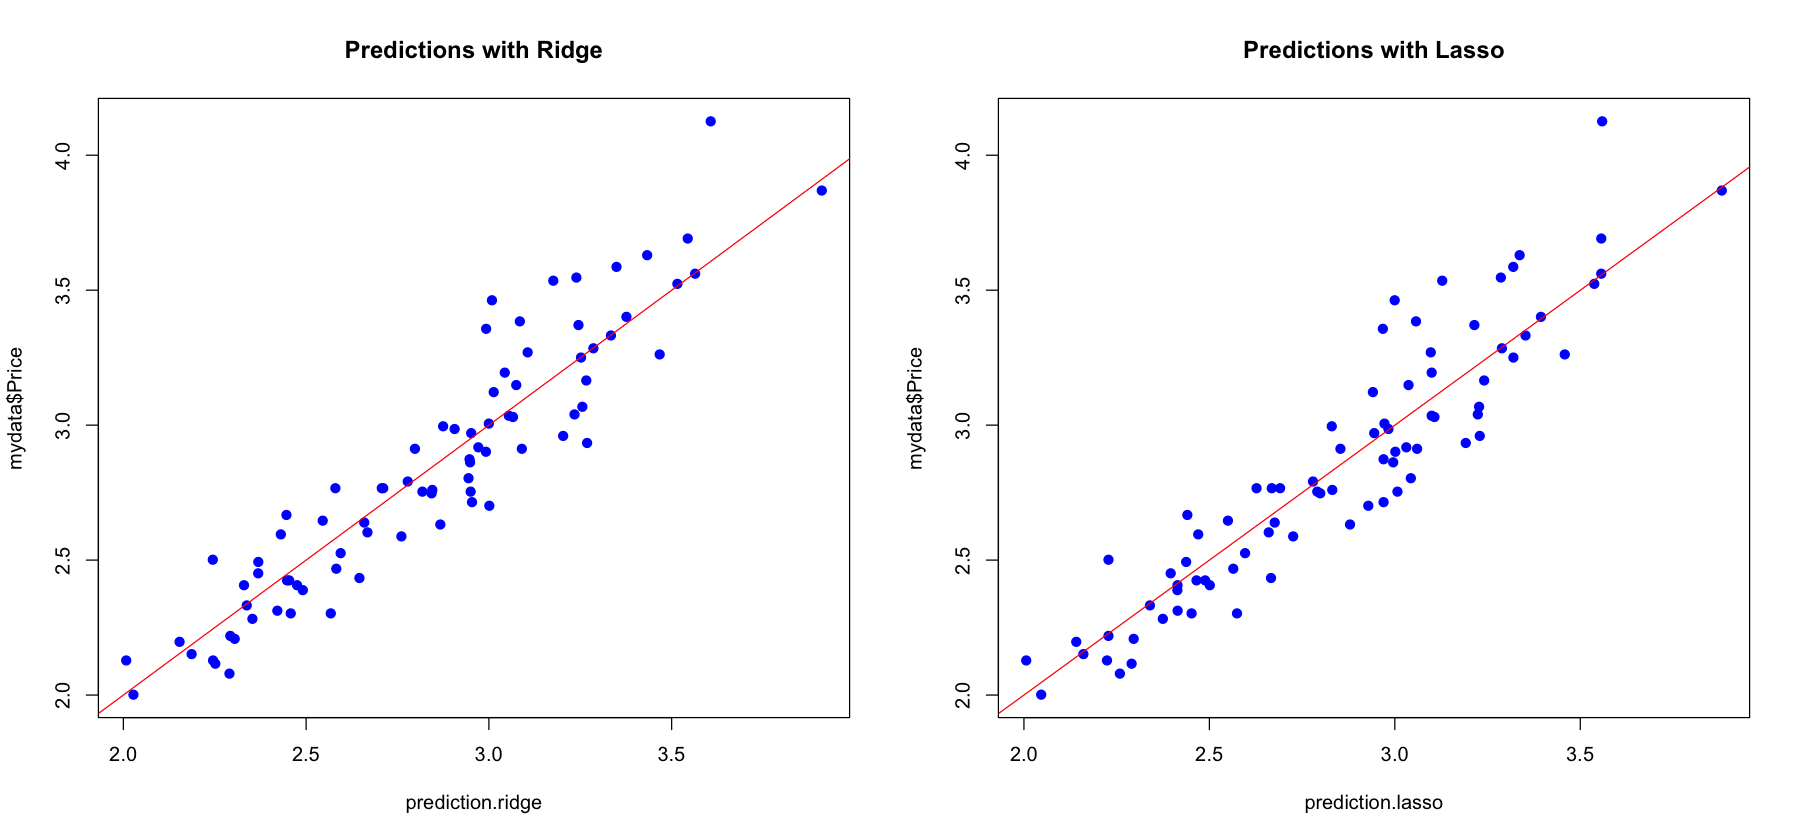

In [83]:
prediction.ridge <- predict(m.ridge.min, newx=X)
prediction.lasso <- predict(m.lasso.min, newx=X)

par(mfrow=c(1,2))
plot(prediction.ridge, mydata$Price,
       main='Predictions with Ridge',col="blue",pch=19)
abline(0,1,col="red")
plot(prediction.lasso, mydata$Price,col="blue",pch=19,
     main='Predictions with Lasso')
abline(0,1,col="red")

### AUTOMATIC SELECTION
Let's now try with stepwise selection
#### FORWARD SELECTION


In [86]:
library(leaps)
m.forward <- regsubsets(Price ~ .+I(MPG.city^2) +  Horsepower:Origin, data=mydata, nvmax=12, method='forward')
summary(m.forward )

Reordering variables and trying again:


Subset selection object
Call: regsubsets.formula(Price ~ . + I(MPG.city^2) + Horsepower:Origin, 
    data = mydata, nvmax = 12, method = "forward")
33 Variables  (and intercept)
                         Forced in Forced out
TypeLarge                    FALSE      FALSE
TypeMidsize                  FALSE      FALSE
TypeSmall                    FALSE      FALSE
TypeSporty                   FALSE      FALSE
MPG.city                     FALSE      FALSE
MPG.highway                  FALSE      FALSE
AirBagsDriver only           FALSE      FALSE
AirBagsNone                  FALSE      FALSE
DriveTrainFront              FALSE      FALSE
DriveTrainRear               FALSE      FALSE
Cylinders4                   FALSE      FALSE
Cylinders5                   FALSE      FALSE
Cylinders6                   FALSE      FALSE
Cylinders8                   FALSE      FALSE
EngineSize                   FALSE      FALSE
Horsepower                   FALSE      FALSE
RPM                          FALSE      

In [87]:
## BIC and RSS

#rss
which.min(summary(m.forward)$rss)


# BIc
which.min(summary(m.forward)$bic)


## variance and sd for the estimators

[1] 13

[1] 5


- the model with the smallest RSS is the model with 13 covariates
- usign BIC instead the best model includes 5 covariates

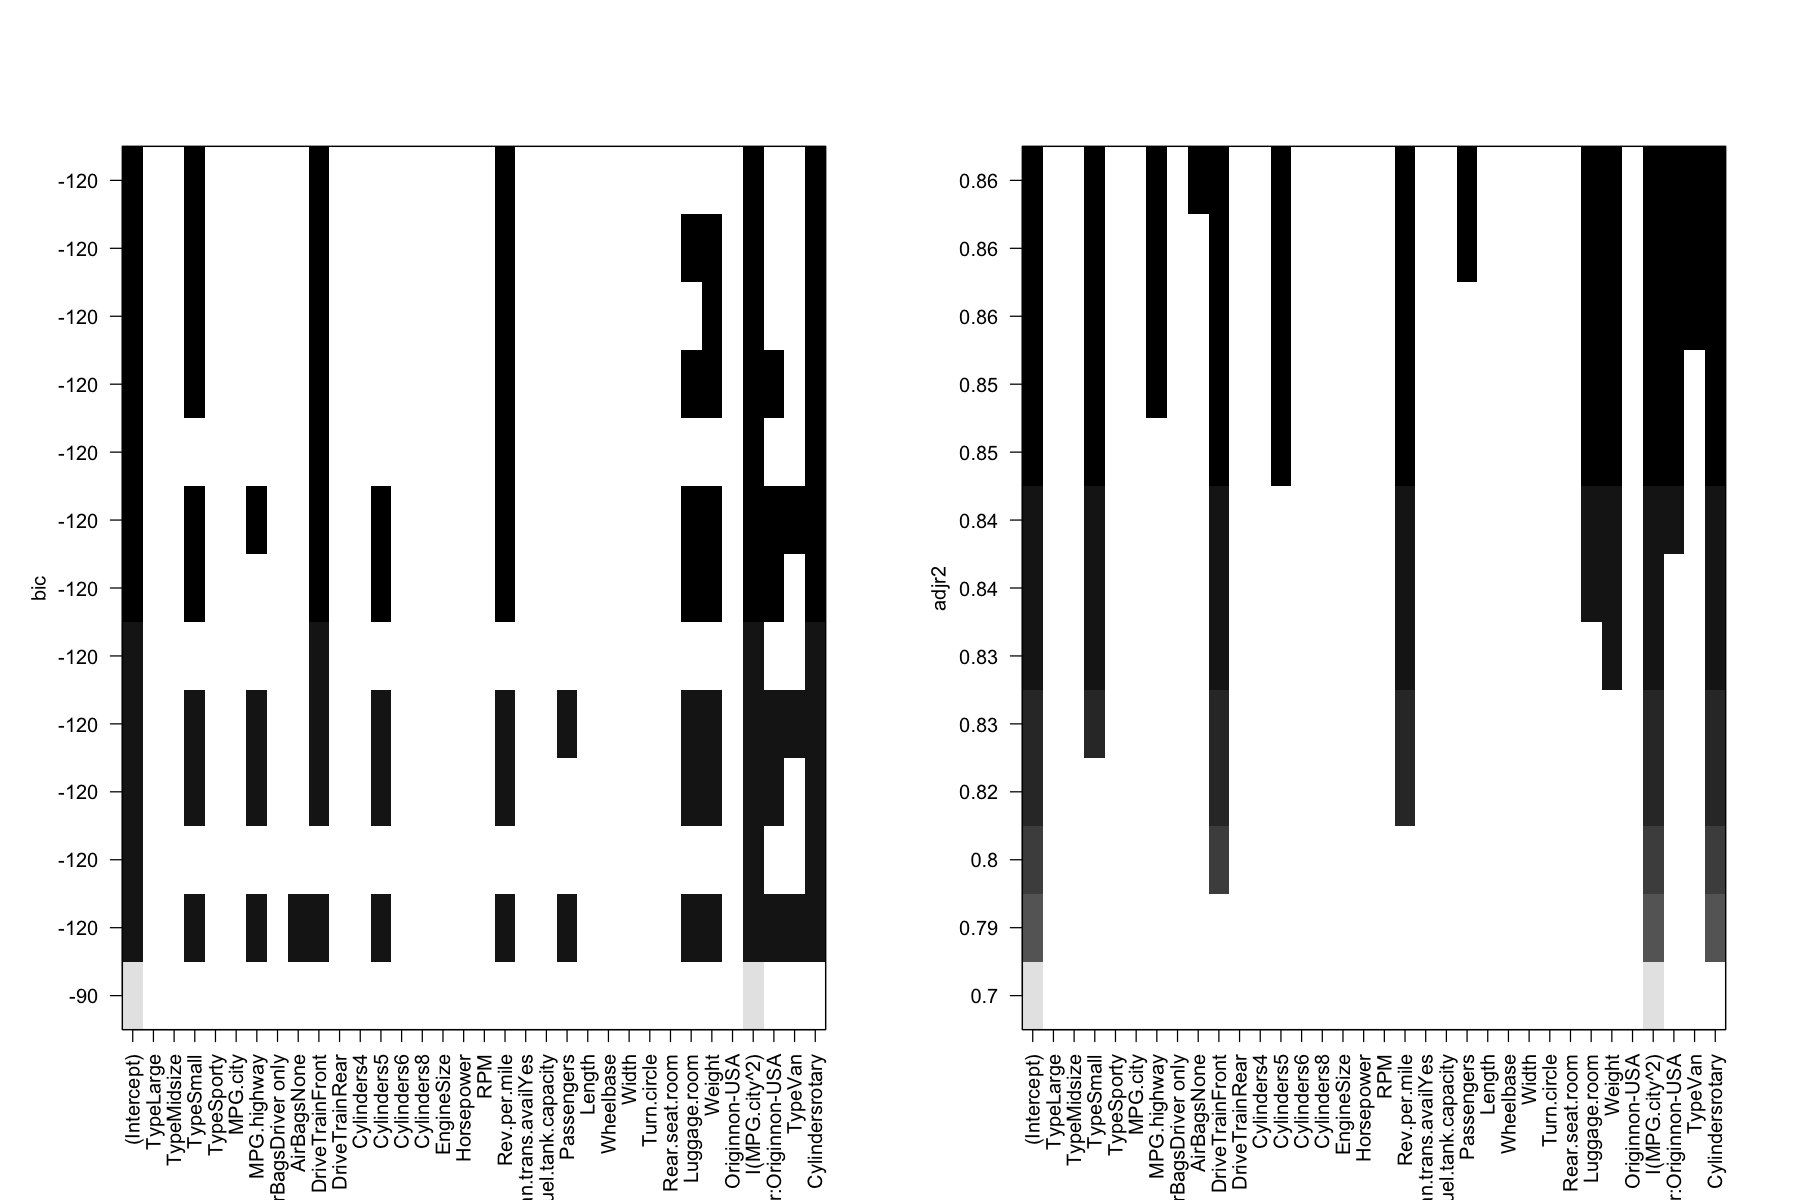

In [88]:
par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.forward)
plot(m.forward, scale='adjr2')

we see as computed before that the best model basing on BIC is 5. Let also plot the number of suggested covariatrs for the different criteria.

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 13 for adjr2 and 5 for BIC"

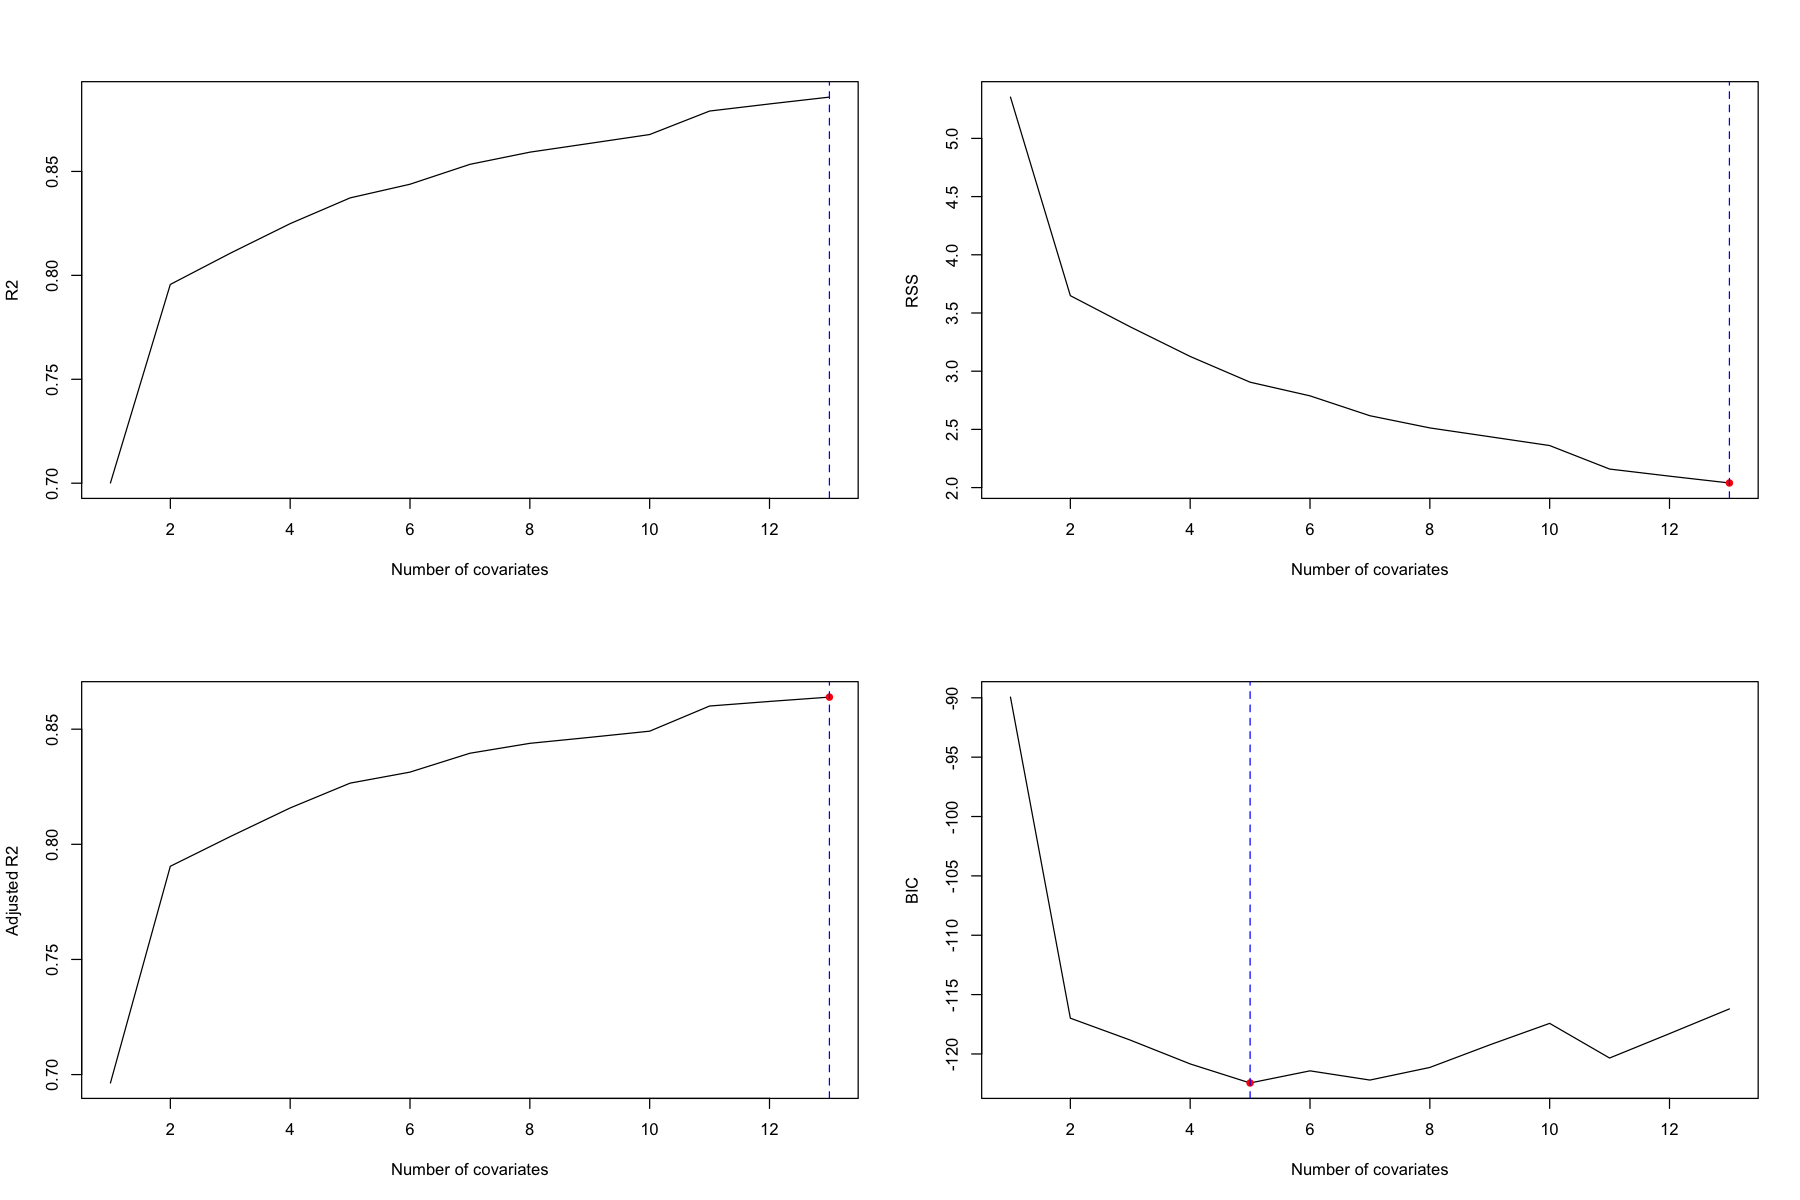

In [91]:
par(mfrow=c(2,2))
## R2
plot(summary(m.forward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.forward)$rsq)
#points(max.rsq, summary(m.forward)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.forward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.forward)$rss)
points(min.rss, summary(m.forward)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.forward)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.forward)$adjr2)
points(max.adjr2, summary(m.forward)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.forward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.forward)$bic)
points(min.bic, summary(m.forward)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

base on BIC we keep the model with the lowest BIC so with a number of covariates equal to : 5

In [94]:
summary(mydata)

      Type        Price          MPG.city      MPG.highway   
 Compact:16   Min.   :2.001   Min.   :16.00   Min.   :22.00  
 Large  :11   1st Qu.:2.455   1st Qu.:19.00   1st Qu.:26.00  
 Midsize:22   Median :2.779   Median :22.00   Median :29.00  
 Small  :21   Mean   :2.840   Mean   :23.09   Mean   :29.98  
 Sporty :12   3rd Qu.:3.161   3rd Qu.:25.00   3rd Qu.:32.75  
 Van    : 0   Max.   :4.126   Max.   :46.00   Max.   :50.00  
               AirBags   DriveTrain  Cylinders    EngineSize      Horsepower   
 Driver & Passenger:16   4WD  : 5   3     : 3   Min.   :1.000   Min.   : 55.0  
 Driver only       :38   Front:63   4     :48   1st Qu.:1.800   1st Qu.:100.0  
 None              :28   Rear :14   5     : 1   Median :2.300   Median :134.5  
                                    6     :24   Mean   :2.589   Mean   :140.0  
                                    8     : 6   3rd Qu.:3.200   3rd Qu.:170.0  
                                    rotary: 0   Max.   :5.700   Max.   :300.0  
      


Call:
lm(formula = Price ~ Cylinders + I(MPG.city^2) + Rev.per.mile + 
    DriveTrain + Type, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68698 -0.15914  0.03065  0.16316  0.65564 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      2.3712256  0.4026905   5.888 1.28e-07 ***
Cylinders4       0.1890267  0.2273317   0.832  0.40856    
Cylinders5       0.6129175  0.3679154   1.666  0.10026    
Cylinders6       0.6463778  0.2688890   2.404  0.01891 *  
Cylinders8       0.8837964  0.3024333   2.922  0.00469 ** 
I(MPG.city^2)   -0.0001730  0.0001899  -0.911  0.36565    
Rev.per.mile     0.0001664  0.0001072   1.552  0.12525    
DriveTrainFront -0.0926440  0.1344849  -0.689  0.49321    
DriveTrainRear   0.0673446  0.1510765   0.446  0.65716    
TypeLarge       -0.1189010  0.1466911  -0.811  0.42041    
TypeMidsize      0.0779494  0.1044678   0.746  0.45811    
TypeSmall       -0.4550514  0.1055487  -4.311 5.29e-05 ***
Type

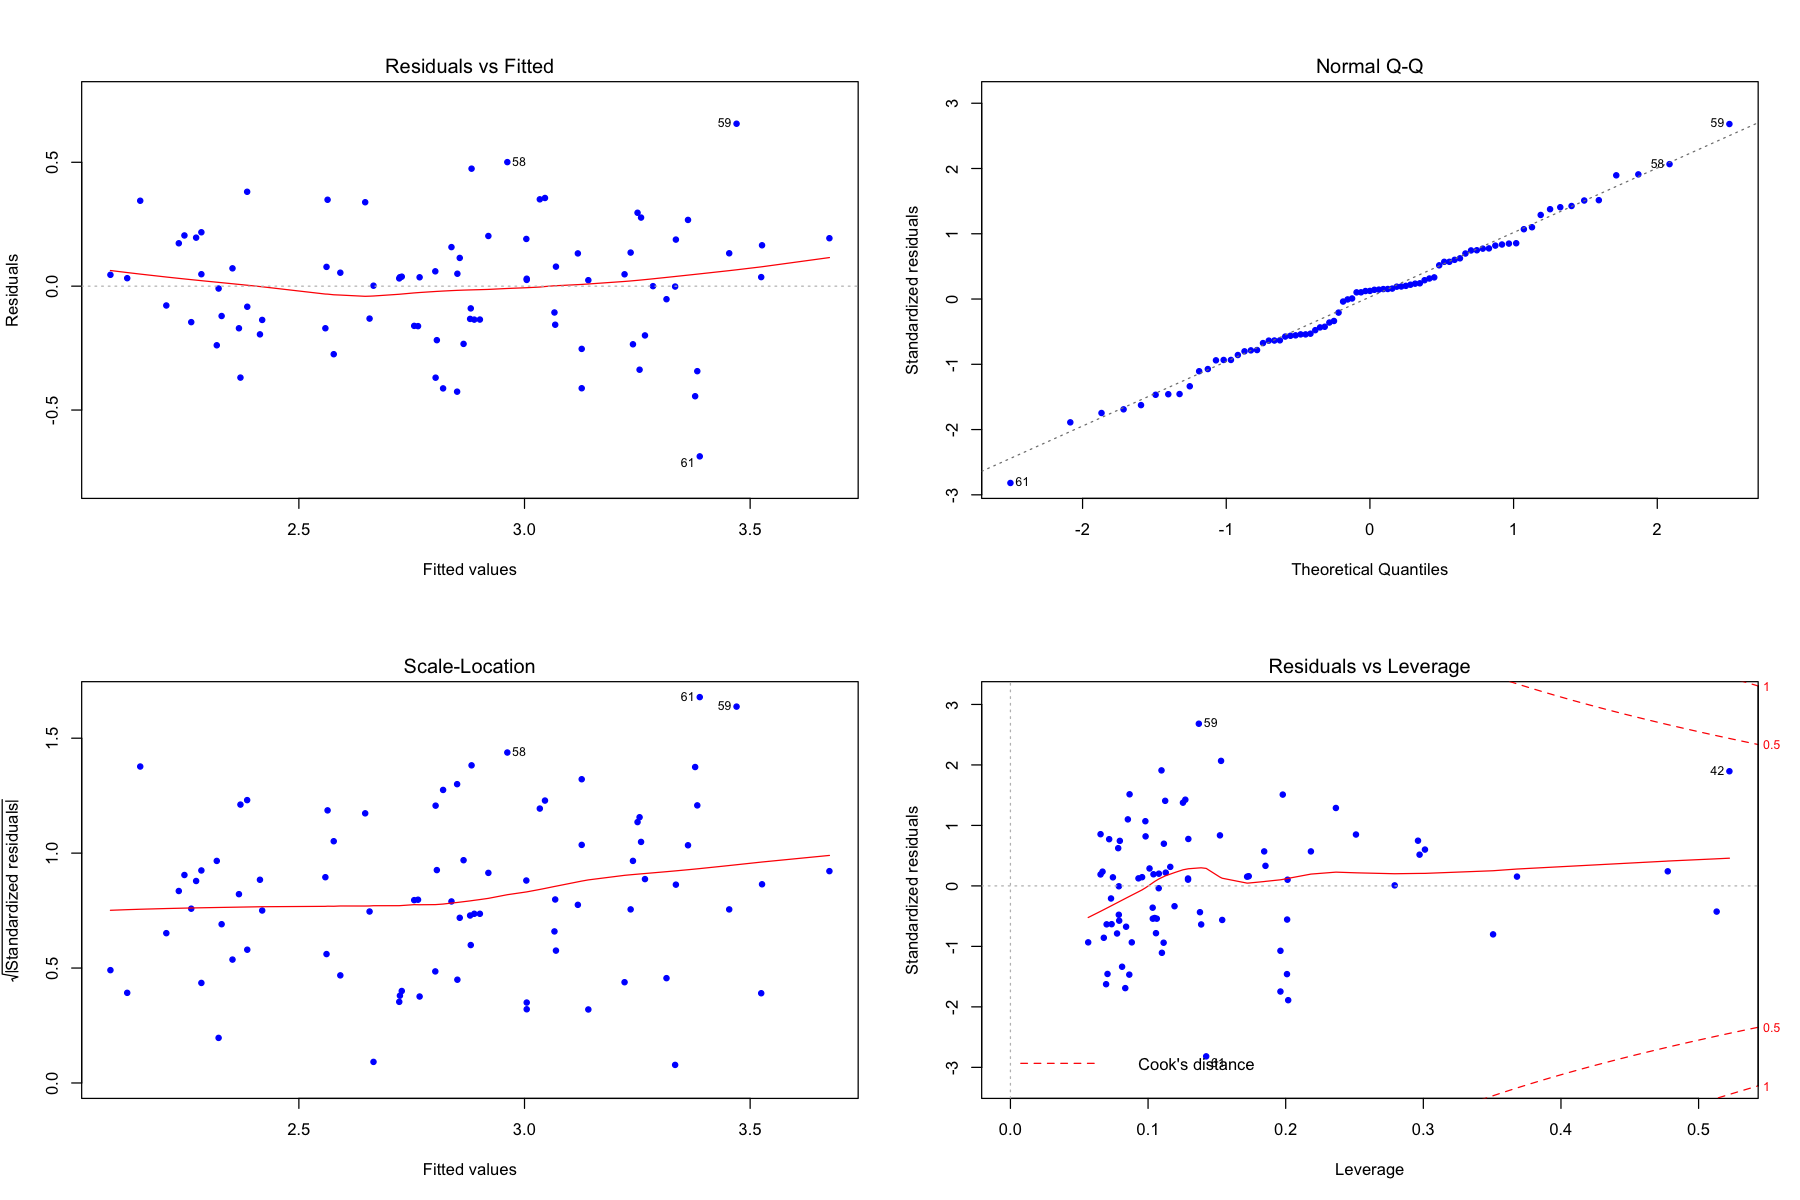

In [98]:
model.bic <- lm(Price ~ Cylinders+I(MPG.city^2)+Rev.per.mile +DriveTrain+Type, data=mydata)
summary(model.bic)
par(mfrow=c(2,2))
plot(model.bic, pch=19, cex=0.7,col="blue")

Now we can judge also our model considering the residuals. 
The graph of residuals indicates that the model does  have a good fit. In fact, the first graph (scatter plot of the residuals) doesn't show a deterministic pattern e. In addition, the mean of the residuals does  appear to be 0 and the variance of the residuals does  appear to be constant, as it should be based on the assumptions that the regression model places on the ε errors. Furthermore, the normality of the residuals is  satisfied  as highlighted in the second graph: the empirical quantiles, in fact, don't deviate from the theoretical quantiles of a standard normal.
To complete the analysis of the residuals, no outliers appear to be present: although R highlights observations, these do not represent outlier observations since Cook's distance is not large. 
The MSE is: 0.24

In [99]:
## FORWARD MSE

p.mglm=predict(model.bic,newdata=mydata)
rmse <- sqrt(mean((mydata$Price - p.mglm)^2))
rmse 

[1] 0.2414285

### BACKWORD SELECTION

Reordering variables and trying again:


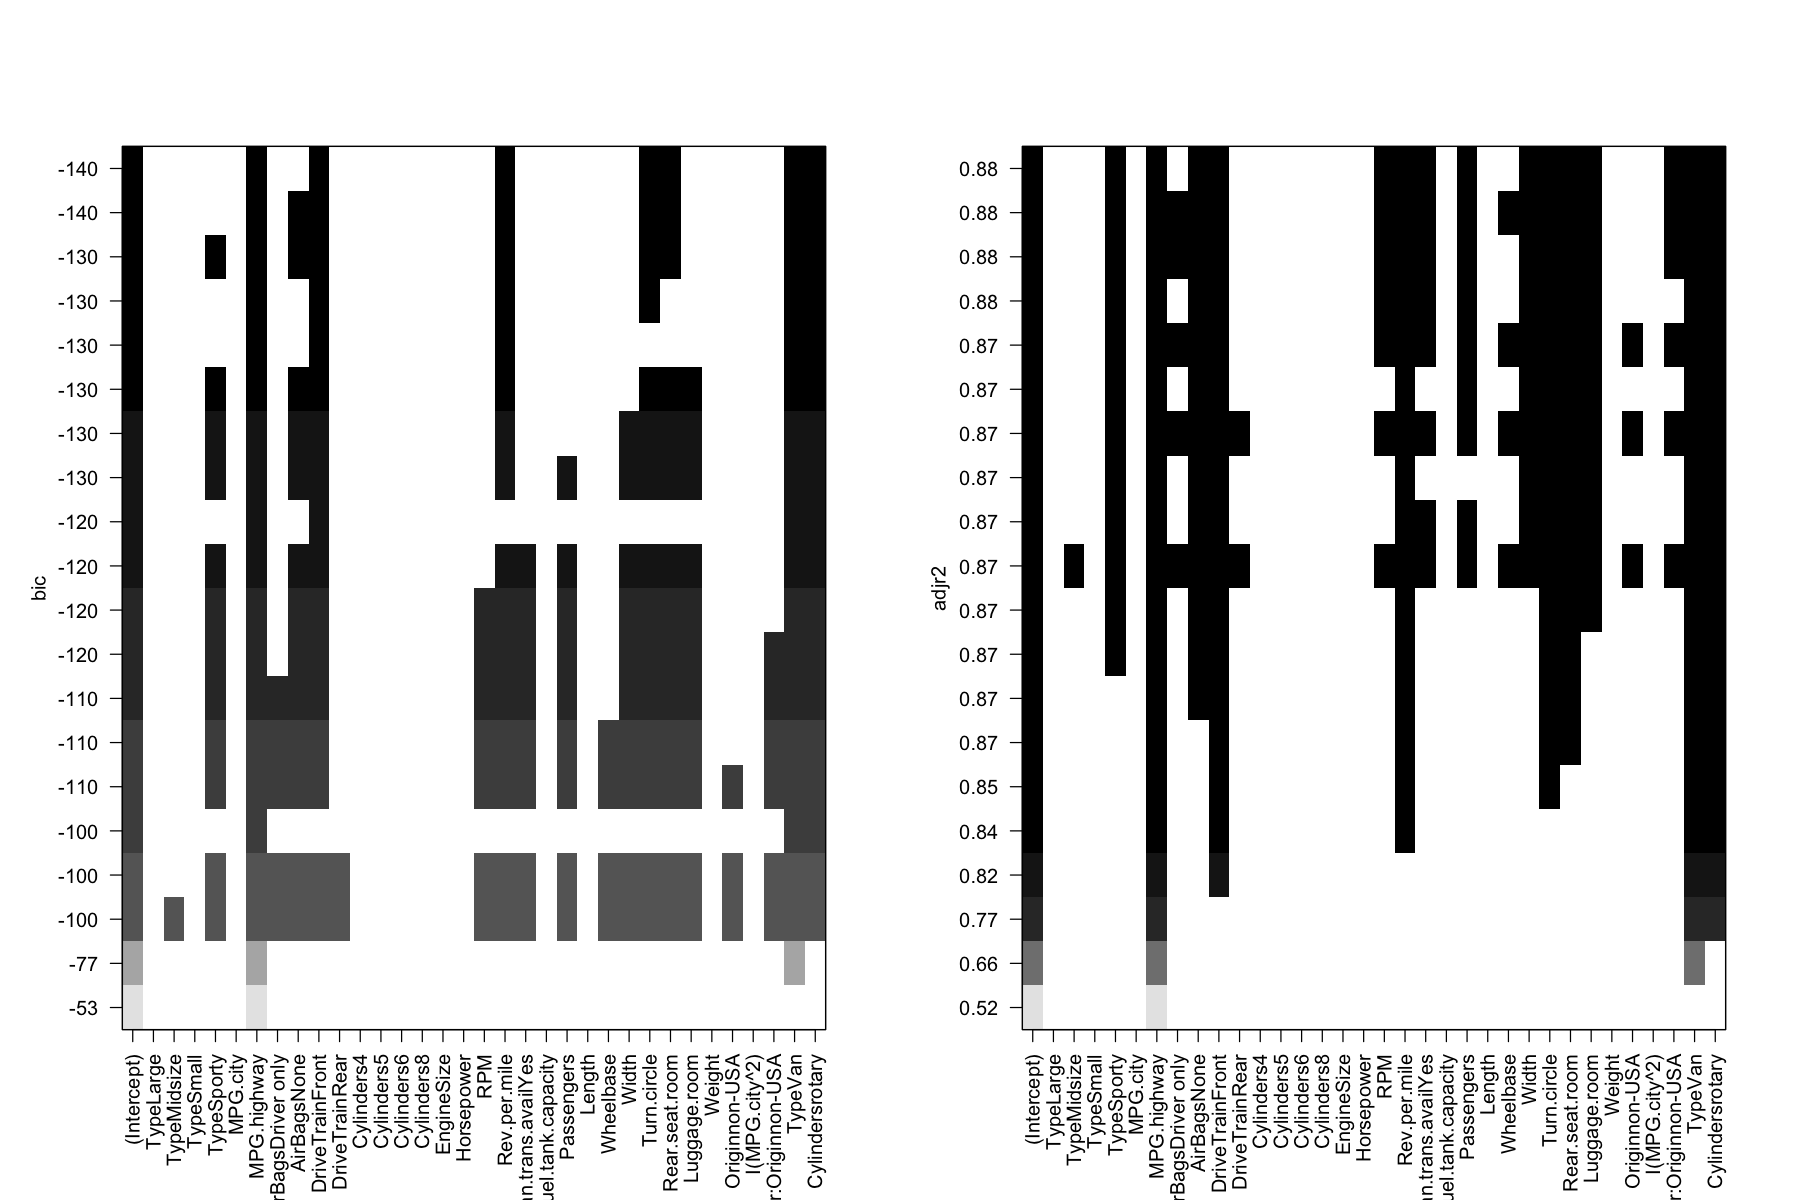

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 15 for adjr2 and 7 for BIC"

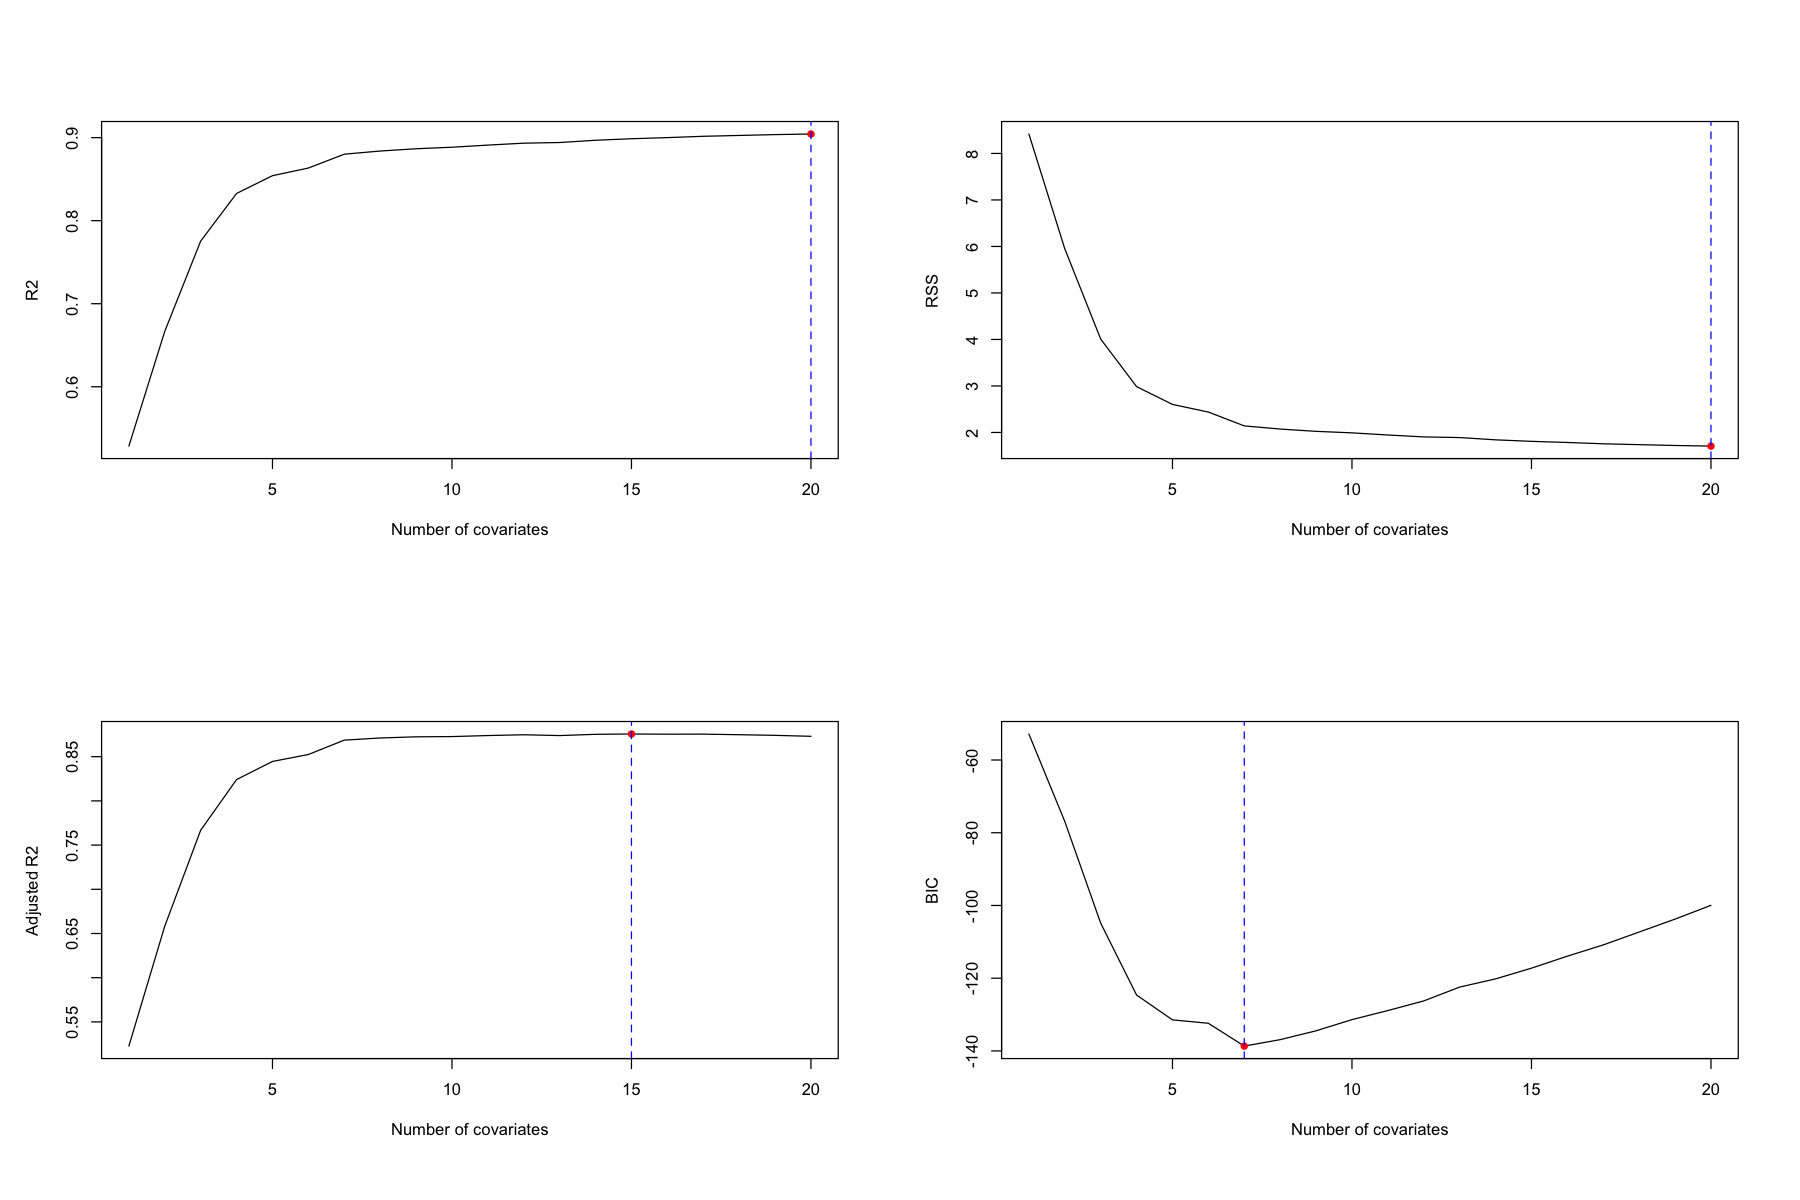

In [102]:
m.backward <- regsubsets(Price ~ . +I(MPG.city^2) +  Horsepower:Origin, data=mydata, nvmax=19, method='backward')
#plot(m.backward)



par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.backward)
plot(m.backward, scale='adjr2')
par(mfrow=c(2,2))
## R2
plot(summary(m.backward)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.backward)$rsq)
points(max.rsq, summary(m.backward)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.backward)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.backward)$rss)
points(min.rss, summary(m.backward)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.backward)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.backward)$adjr2)
points(max.adjr2, summary(m.backward)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.backward)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.backward)$bic)
points(min.bic, summary(m.backward)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 

As you can see, forward and backward give us  a different  amount of covariates based on BIC. In fact in this case we have 7 covariates

In [103]:
summary(mydata)

      Type        Price          MPG.city      MPG.highway   
 Compact:16   Min.   :2.001   Min.   :16.00   Min.   :22.00  
 Large  :11   1st Qu.:2.455   1st Qu.:19.00   1st Qu.:26.00  
 Midsize:22   Median :2.779   Median :22.00   Median :29.00  
 Small  :21   Mean   :2.840   Mean   :23.09   Mean   :29.98  
 Sporty :12   3rd Qu.:3.161   3rd Qu.:25.00   3rd Qu.:32.75  
 Van    : 0   Max.   :4.126   Max.   :46.00   Max.   :50.00  
               AirBags   DriveTrain  Cylinders    EngineSize      Horsepower   
 Driver & Passenger:16   4WD  : 5   3     : 3   Min.   :1.000   Min.   : 55.0  
 Driver only       :38   Front:63   4     :48   1st Qu.:1.800   1st Qu.:100.0  
 None              :28   Rear :14   5     : 1   Median :2.300   Median :134.5  
                                    6     :24   Mean   :2.589   Mean   :140.0  
                                    8     : 6   3rd Qu.:3.200   3rd Qu.:170.0  
                                    rotary: 0   Max.   :5.700   Max.   :300.0  
      


Call:
lm(formula = Price ~ Turn.circle + Type + Cylinders + Rev.per.mile + 
    DriveTrain + Width + MPG.highway, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69371 -0.14747  0.01049  0.15823  0.61191 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.5995927  1.3105290   2.747  0.00772 ** 
Turn.circle     -0.0043360  0.0188410  -0.230  0.81869    
TypeLarge       -0.0608792  0.1648206  -0.369  0.71302    
TypeMidsize      0.0972383  0.1118330   0.869  0.38768    
TypeSmall       -0.4608256  0.1100685  -4.187 8.44e-05 ***
TypeSporty      -0.1808488  0.1069160  -1.692  0.09539 .  
Cylinders4       0.2002395  0.2207541   0.907  0.36762    
Cylinders5       0.6039463  0.3671397   1.645  0.10465    
Cylinders6       0.6341849  0.2824688   2.245  0.02806 *  
Cylinders8       0.8782724  0.3262368   2.692  0.00896 ** 
Rev.per.mile     0.0001249  0.0001118   1.117  0.26777    
DriveTrainFront -0.0687439  0.1347340  -0.5

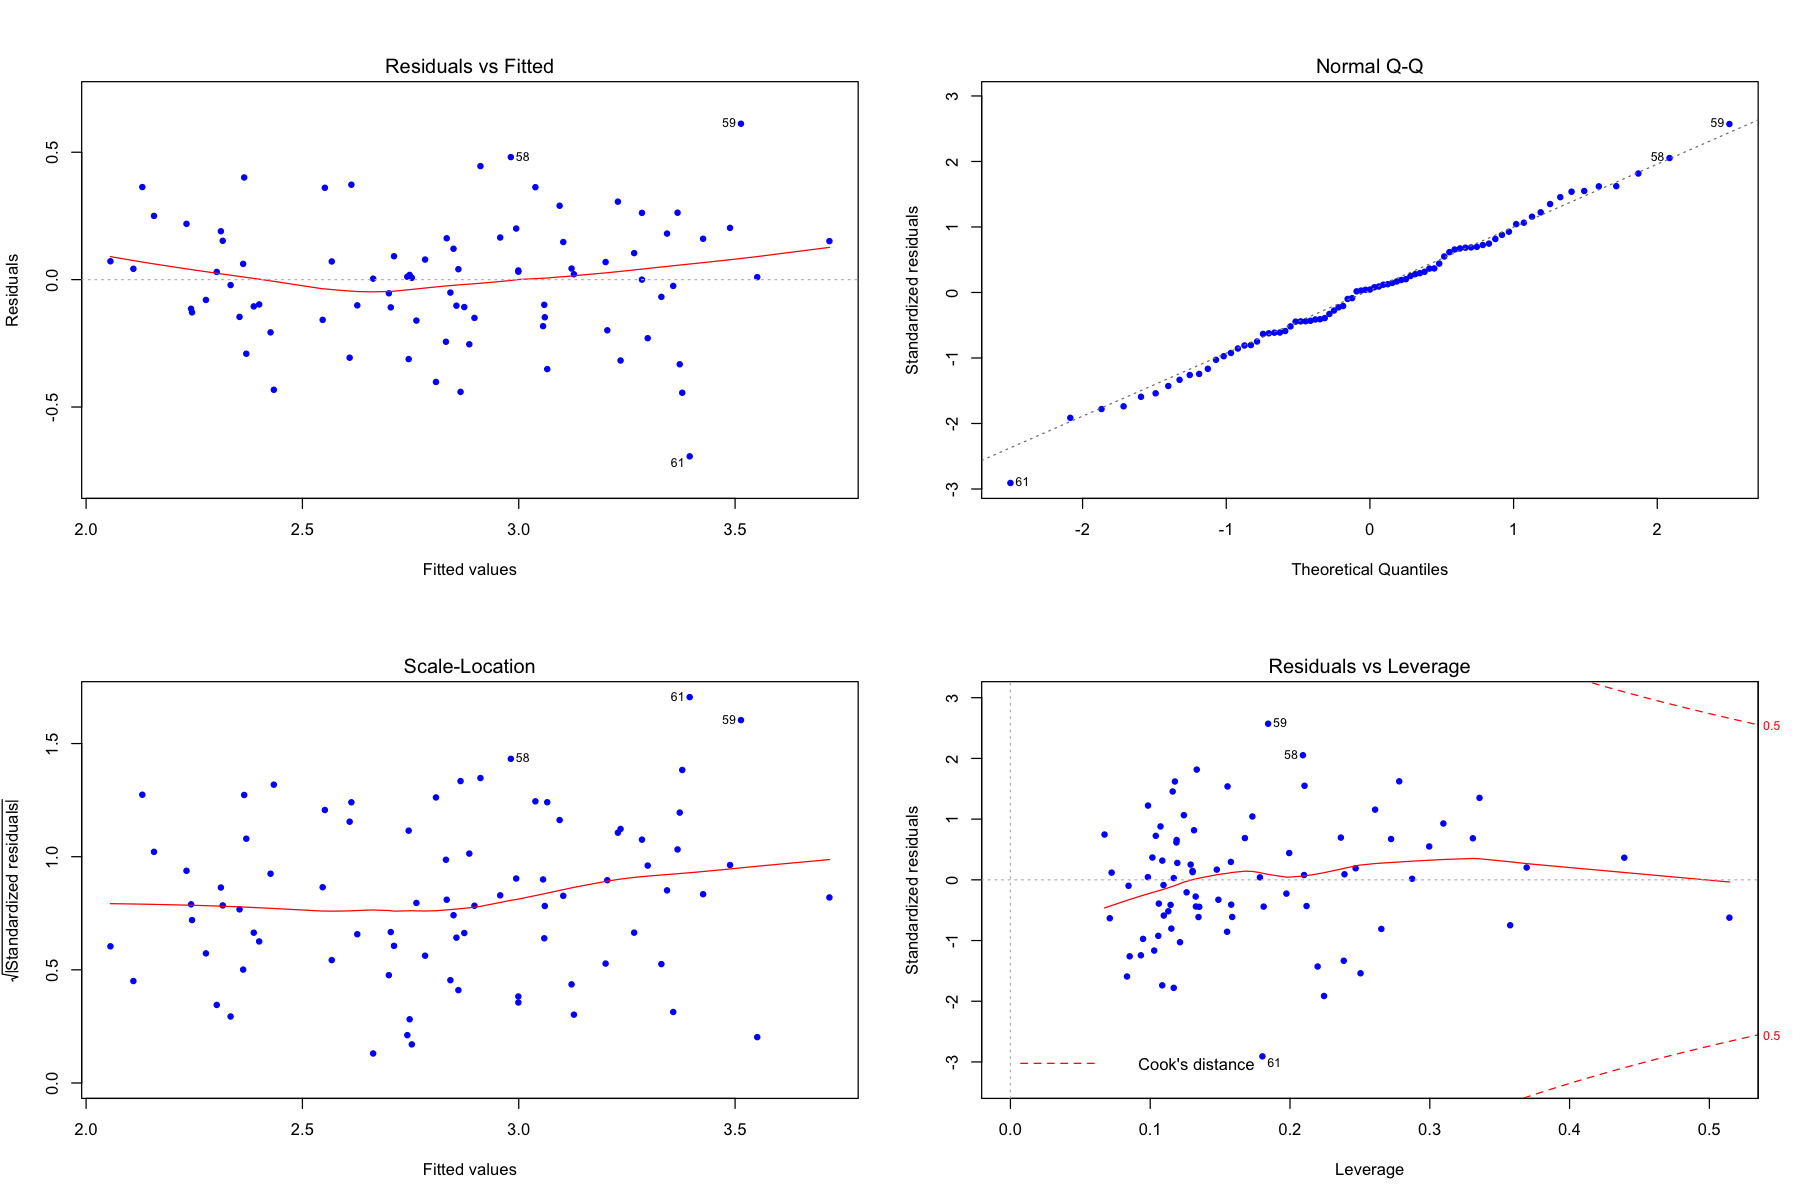

In [105]:
model.bic <- lm(Price ~ Turn.circle +Type+Cylinders+Rev.per.mile +DriveTrain+ Width+MPG.highway, data=mydata)
summary(model.bic)
par(mfrow=c(2,2))
plot(model.bic, pch=19, cex=0.7,col="blue")

Again we can judge also our model considering the residuals. 
The graph of residuals indicates that the model does  have a good fit. In fact, the first graph (scatter plot of the residuals) doesn't show a deterministic pattern e. In addition, the mean of the residuals does  appear to be 0 and the variance of the residuals does  appear to be constant, as it should be based on the assumptions that the regression model places on the ε errors. Furthermore, the normality of the residuals is  satisfied  as highlighted in the second graph: the empirical quantiles, in fact, don't deviate from the theoretical quantiles of a standard normal.
To complete the analysis of the residuals, no outliers appear to be present: although R highlights observations, these do not represent outlier observations since Cook's distance is not large. 
The MSE is again: 0.24

In [106]:
p.mglm=predict(model.bic,newdata=mydata)
rmse <- sqrt(mean((mydata$Price - p.mglm)^2))
rmse 

[1] 0.2381568

### MIXED SELECTION

Reordering variables and trying again:


(Intercept)      TypeSporty     MPG.highway     AirBagsNone DriveTrainFront 
   3.617383e+00    2.128735e-02   -4.580477e-02   -3.832407e-01   -1.603667e-01 
   Rev.per.mile     Turn.circle  Rear.seat.room         TypeVan Cylindersrotary 
   1.947483e-05   -7.356091e-03    3.937829e-02    0.000000e+00    0.000000e+00

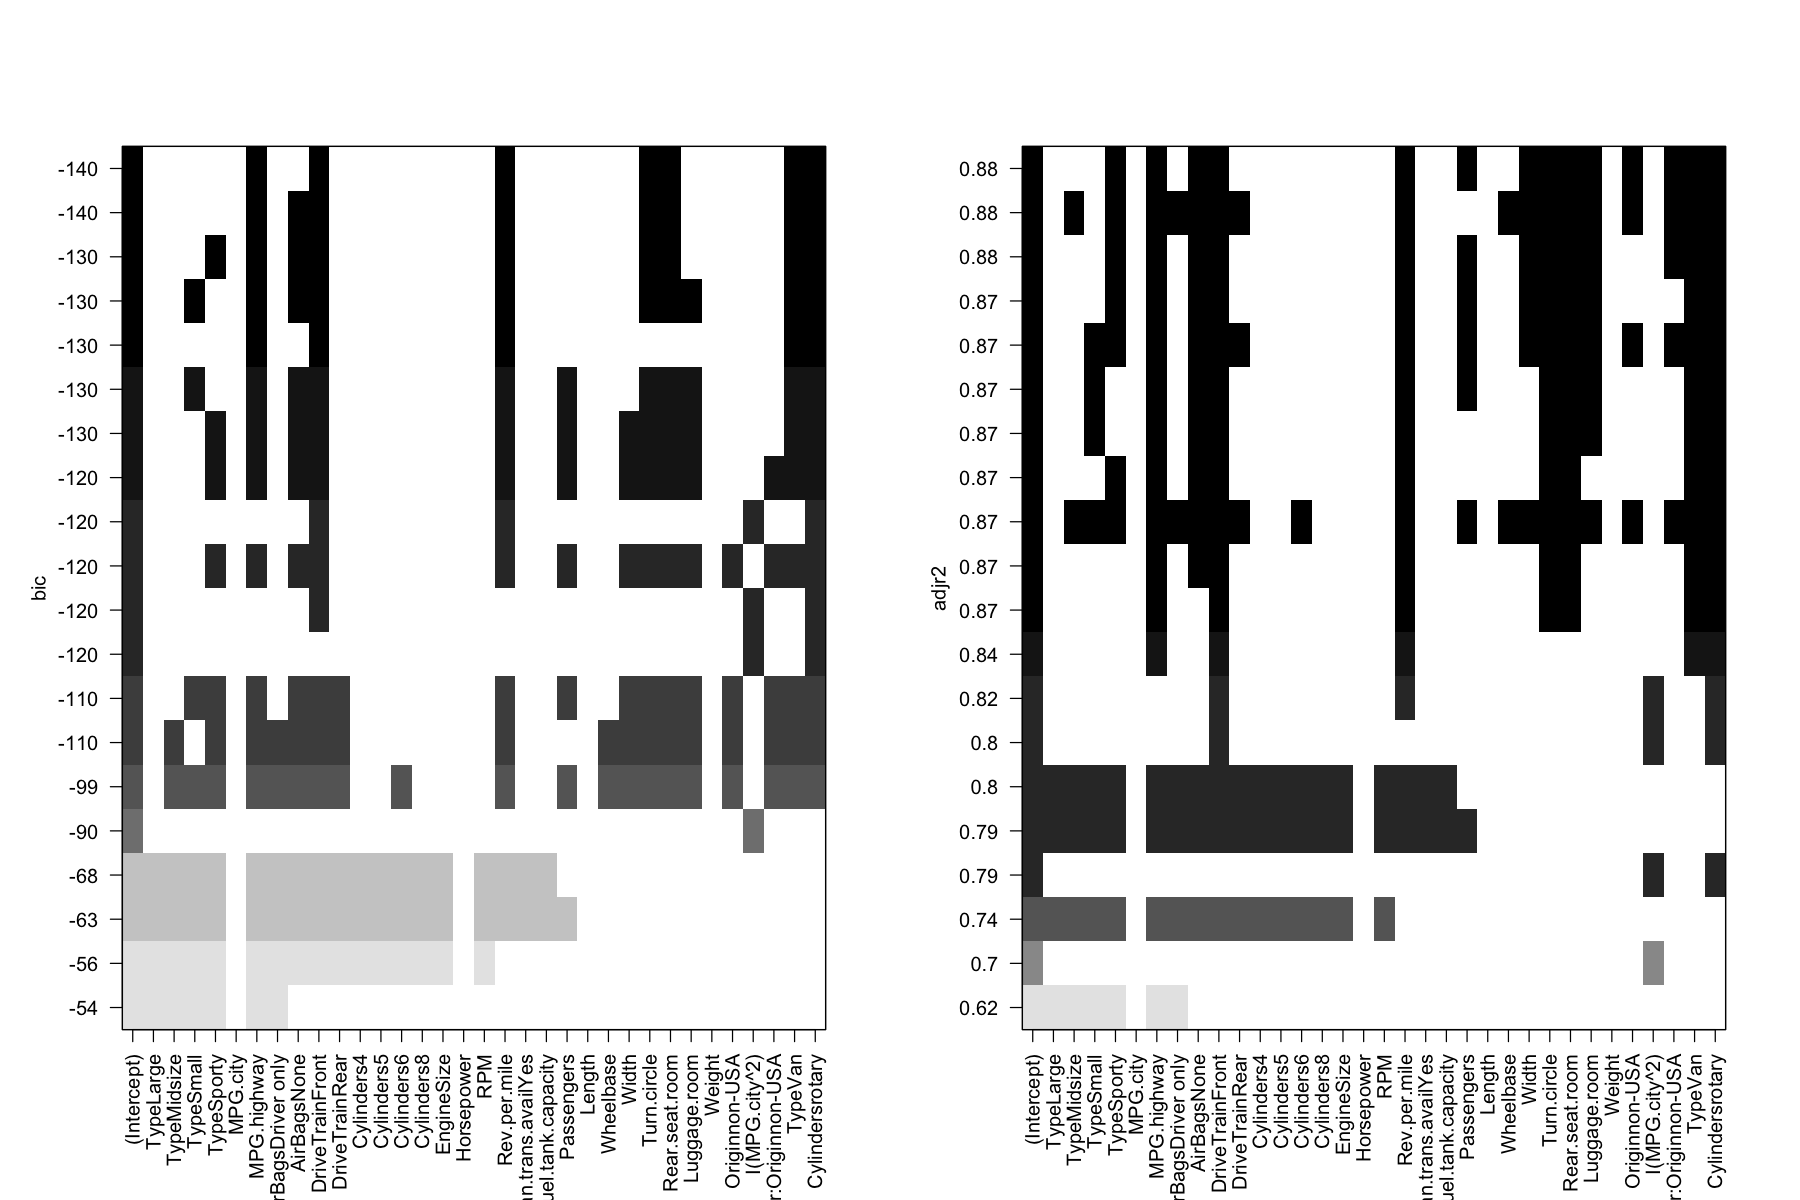

[1] "the number of covariates for the best model base on BIC and AdjR2 are: 14 for adjr2 and 7 for BIC"

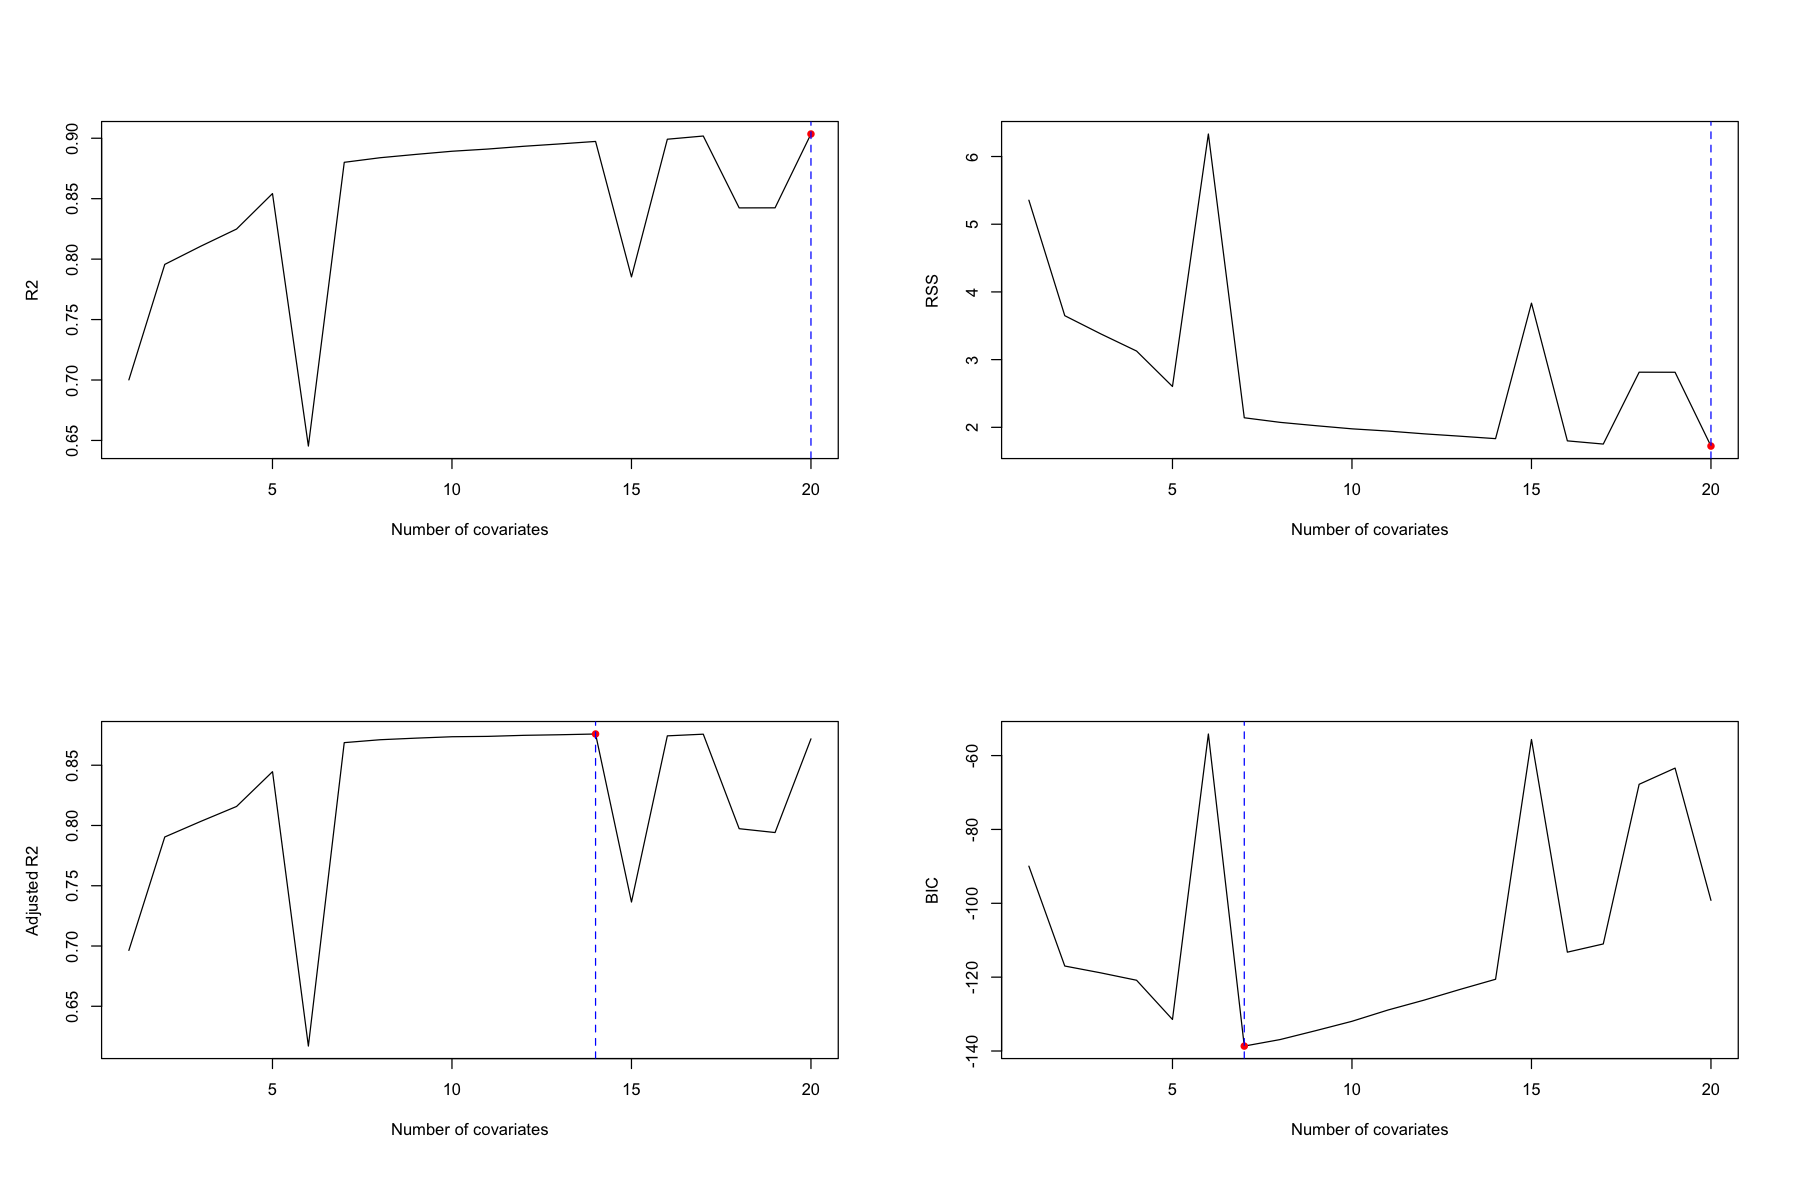

In [107]:
m.seqrep <- regsubsets(Price ~ .+I(MPG.city^2) +  Horsepower:Origin, data=mydata, nvmax=19, method='seqrep')

coef(m.seqrep,9 )

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 10)
plot(m.seqrep)
plot(m.seqrep, scale='adjr2')

par(mfrow=c(2,2))
## R2
plot(summary(m.seqrep)$rsq, xlab='Number of covariates', ylab='R2', type='l')
## add on the indication of the best model
max.rsq <- which.max(summary(m.seqrep)$rsq)
points(max.rsq, summary(m.seqrep)$rsq[max.rsq], col='red', pch=16)
abline(v=max.rsq, col="blue",lty=2)


## RSS
plot(summary(m.seqrep)$rss, xlab='Number of covariates', ylab='RSS', type='l')
min.rss <- which.min(summary(m.seqrep)$rss)
points(min.rss, summary(m.seqrep)$rss[min.rss], col='red', pch=16)
abline(v=min.rss, col="blue",lty=2)


## Adjusted R2
plot(summary(m.seqrep)$adjr2, xlab='Number of covariates',
ylab='Adjusted R2', type='l')
max.adjr2 <- which.max(summary(m.seqrep)$adjr2)
points(max.adjr2, summary(m.seqrep)$adjr2[max.adjr2], col='red', pch=16)
abline(v=max.adjr2, col="blue",lty=2)


## BIC
plot(summary(m.seqrep)$bic, xlab='Number of covariates', ylab='BIC', type='l')
min.bic <- which.min(summary(m.seqrep)$bic)
points(min.bic, summary(m.seqrep)$bic[min.bic], col='red', pch=16)
abline(v=min.bic, col="blue",lty=2)


paste0("the number of covariates for the best model base on BIC and AdjR2 are:", " ", max.adjr2, " ", "for adjr2 and ", min.bic, " for BIC") 


As we can see,  in this case we have 7 covariates again based on BIC. And they are the same of backward also the MSE=0.24.

### PRINCIPAL COMPONENT ANALYSIS
Let's consider Principal component analysis in order to see if it is useful.
I set the seed at 222. Let's also keep the interaction term and quadratic one.

In [179]:
library(pls)
set.seed(222)
mydata <- data.frame(sapply(mydata, as.numeric))[-1]
m.pcr <- pcr(Price ~ . +I(MPG.city^2) +  Horsepower:Origin, scale=TRUE, validation='CV', data=mydata)
summary(m.pcr)

Data: 	X dimension: 82 22 
	Y dimension: 82 1
Fit method: svdpc
Number of components considered: 22

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           10.02    7.523    5.851    5.696    5.649    5.671    5.719
adjCV        10.02    7.515    5.833    5.671    5.631    5.656    5.699
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       5.848    5.849    5.798     5.903     5.601     5.650     5.562
adjCV    5.832    5.822    5.717     5.847     5.550     5.597     5.511
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        5.648     5.460     5.221     5.241     5.308     5.468     5.525
adjCV     5.592     5.389     5.148     5.174     5.245     5.396     5.449
       21 comps  22 comps
CV        5.690     5.606
adjCV     5.606     5.503

TRAINING: % variance explained
       1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 

The output provides the result of the cross validation in terms of square root of the MSE for each number of PCs. -Choose the optimum through a graphical inspection of the results considering MSE and $R^{2}$.
We see that the  number of PCs needed is:  23
While the best number of components provide with 'SelectNcomp' is :2
We also have that the value of MSE is reported below.

In [180]:
MSEP(m.pcr, ncomp=selectNcomp(m.pcr, method='onesigma', ncomp=22))

       (Intercept)  2 comps
CV           100.4    34.24
adjCV        100.4    34.03

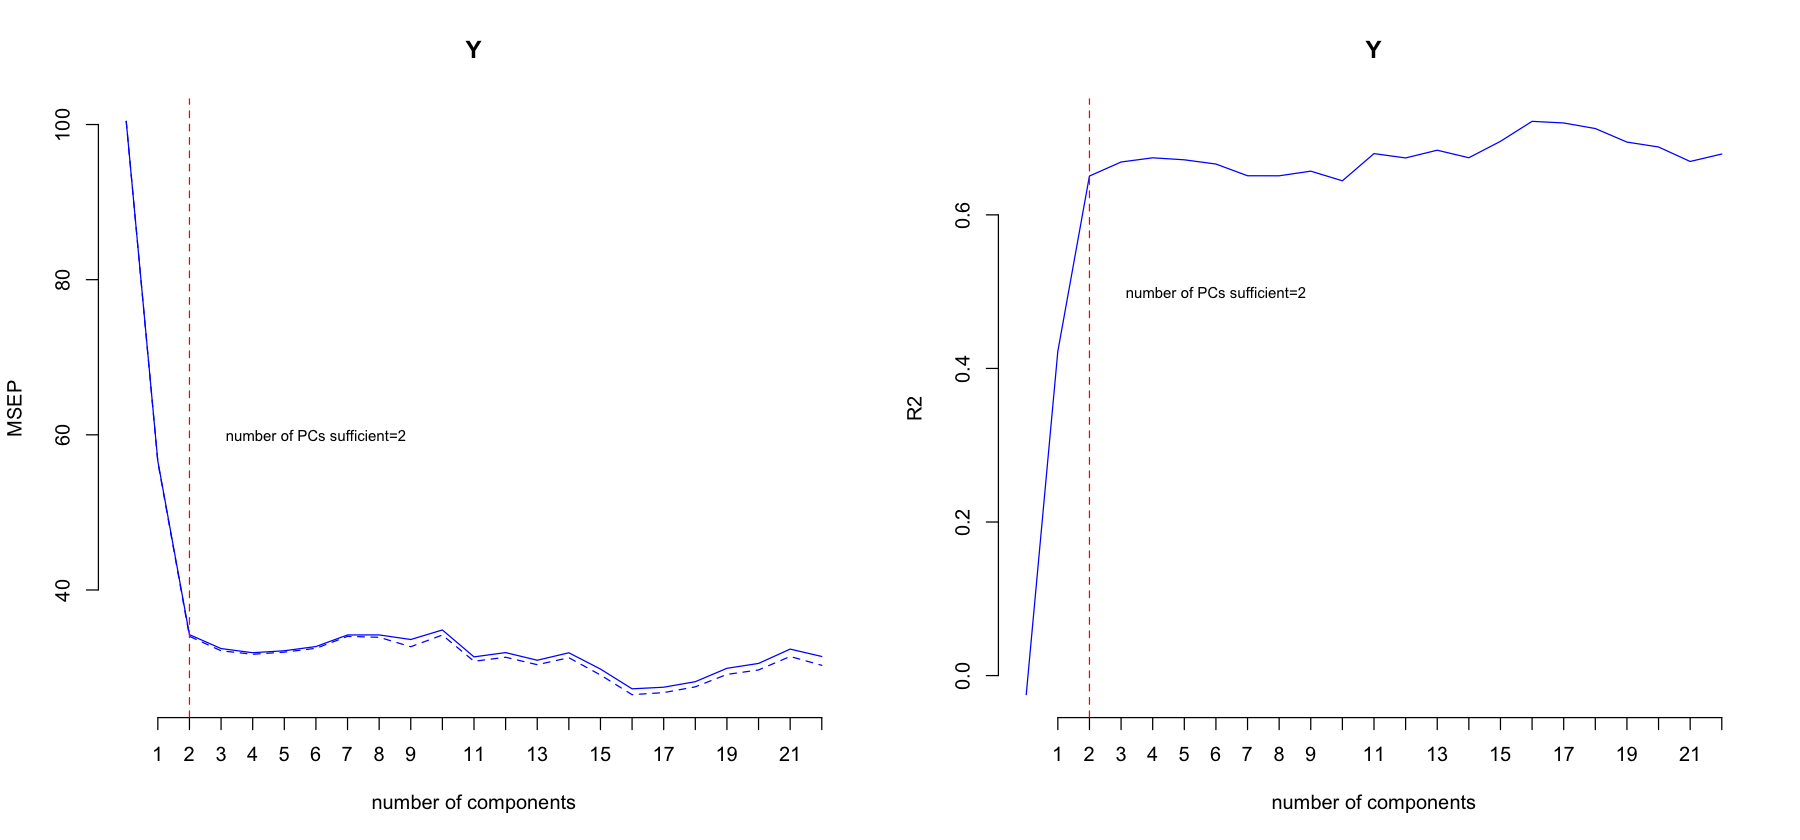

In [183]:
par(mfrow=c(1,2))
## graph without axes

validationplot(m.pcr, val.type='MSEP', main='Y', axes=FALSE, col="blue")
## add on the x-axis (1) with the specification (at) of the points at which tick-mar ## are to be drawn
axis(1, at=1:22)
## add on the y-axis
axis(2)
text(x=6, y=60,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=22)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=22), col="red",lt=2)

validationplot(m.pcr, val.type='R2', main='Y', axes=FALSE,col="blue")
axis(1, at=1:22)
axis(2)
text(x=6, y=0.5,cex=0.75,paste0("number of PCs sufficient=", selectNcomp(m.pcr, method='onesigma', ncomp=22)))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=22), col="red",lt=2)

Let's look how much variance is explained by the 12 components.
While te explained variance for our 5 PCs obtained before is: 68%

Comp 1      Comp 2      Comp 3      Comp 4      Comp 5      Comp 6 
57.17460307 12.76849815  6.41274519  5.30083637  3.75305229  2.75422908 
     Comp 7      Comp 8      Comp 9     Comp 10     Comp 11     Comp 12 
 2.25235861  1.84879475  1.41005020  1.39541429  1.13343654  0.95603886 
    Comp 13     Comp 14     Comp 15     Comp 16     Comp 17     Comp 18 
 0.66588247  0.57512099  0.43288870  0.31692883  0.26966876  0.24206915 
    Comp 19     Comp 20     Comp 21     Comp 22 
 0.15931904  0.09520678  0.06194136  0.02091653

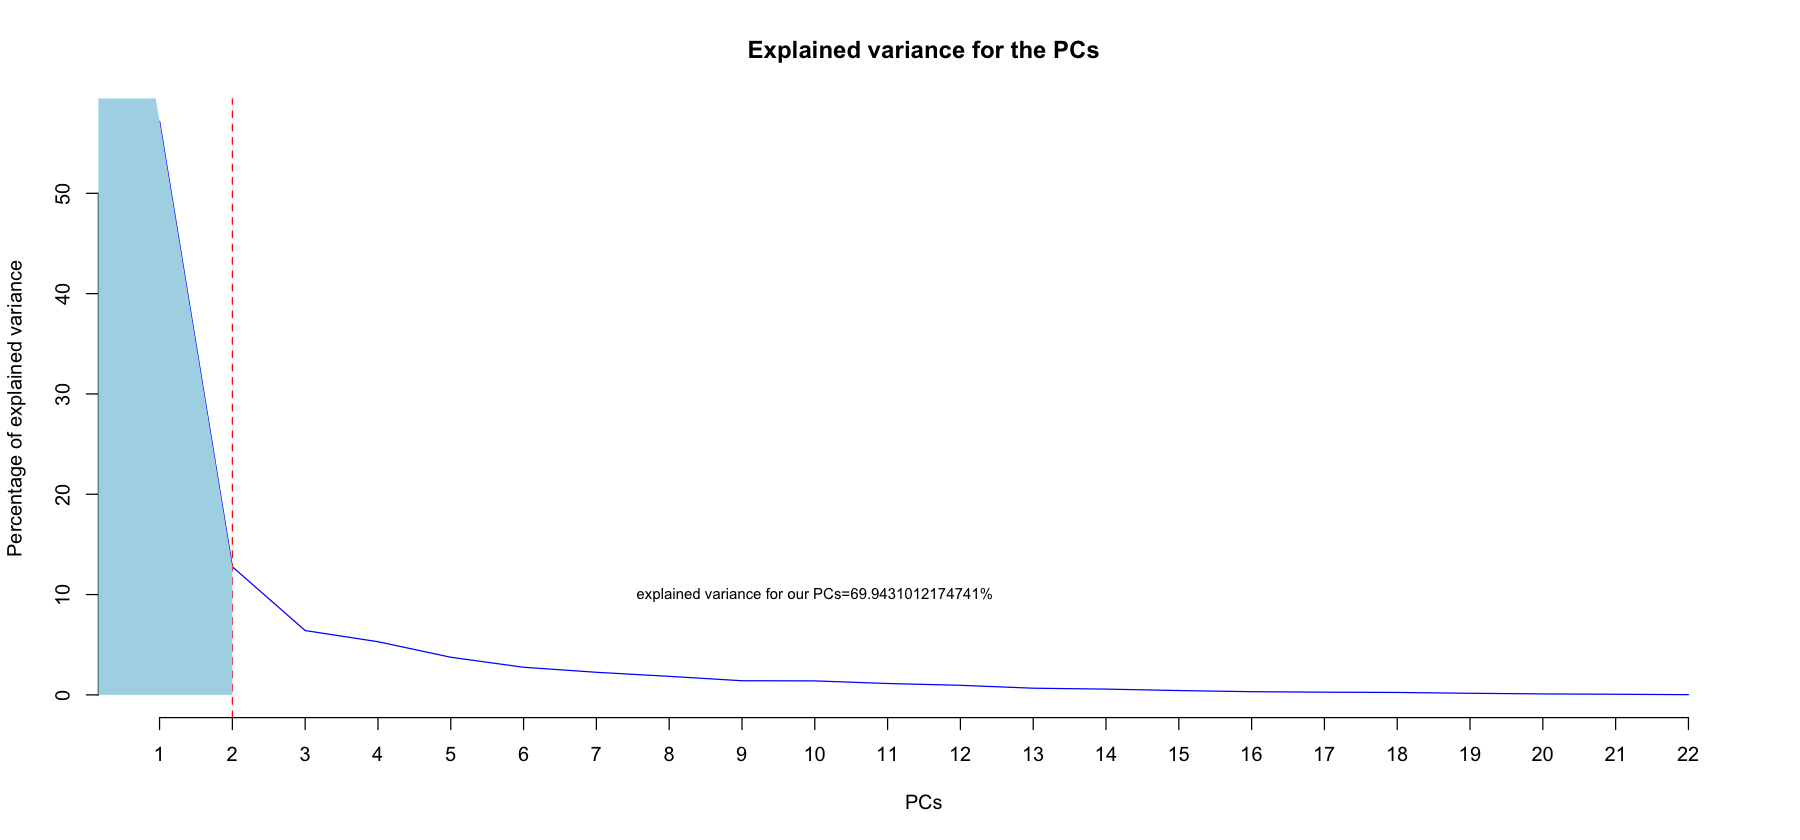

In [185]:
## explained variance
explvar(m.pcr)
sum=sum(explvar(m.pcr)[1:selectNcomp(m.pcr, method='onesigma', ncomp=12)])

## plot:

plot(1:22, explvar(m.pcr), ylab='Percentage of explained variance',
        xlab='PCs', type='l', axes=FALSE,col="blue",main="Explained variance for the PCs")
axis(1, at=1:22)
axis(2)
text(x=10, y=10,cex=0.75,paste0("explained variance for our PCs=",sum,"%"))
abline(v=selectNcomp(m.pcr, method='onesigma', ncomp=23), col="red",lt=2)



x2 = c(0,0,1:2,2)
y2 = c(0,100,explvar(m.pcr)[1:selectNcomp(m.pcr, method='onesigma', ncomp=22)],0)
polygon(x2,y2, col="lightblue", border=NA)

Let's now  plot Plot the regression coefficients associated to the models with increasing PCs, from 1 to 5
We see that we have our 5 models. We look for the picks. As picks are higher as our model is better (model 1 coefficients almost 0). 
On the basis of the first PC,Price is associated to cylinders, to the features of the nk.capacity, lenght and weight. The second PC gives weight also to the presence of horsepower.

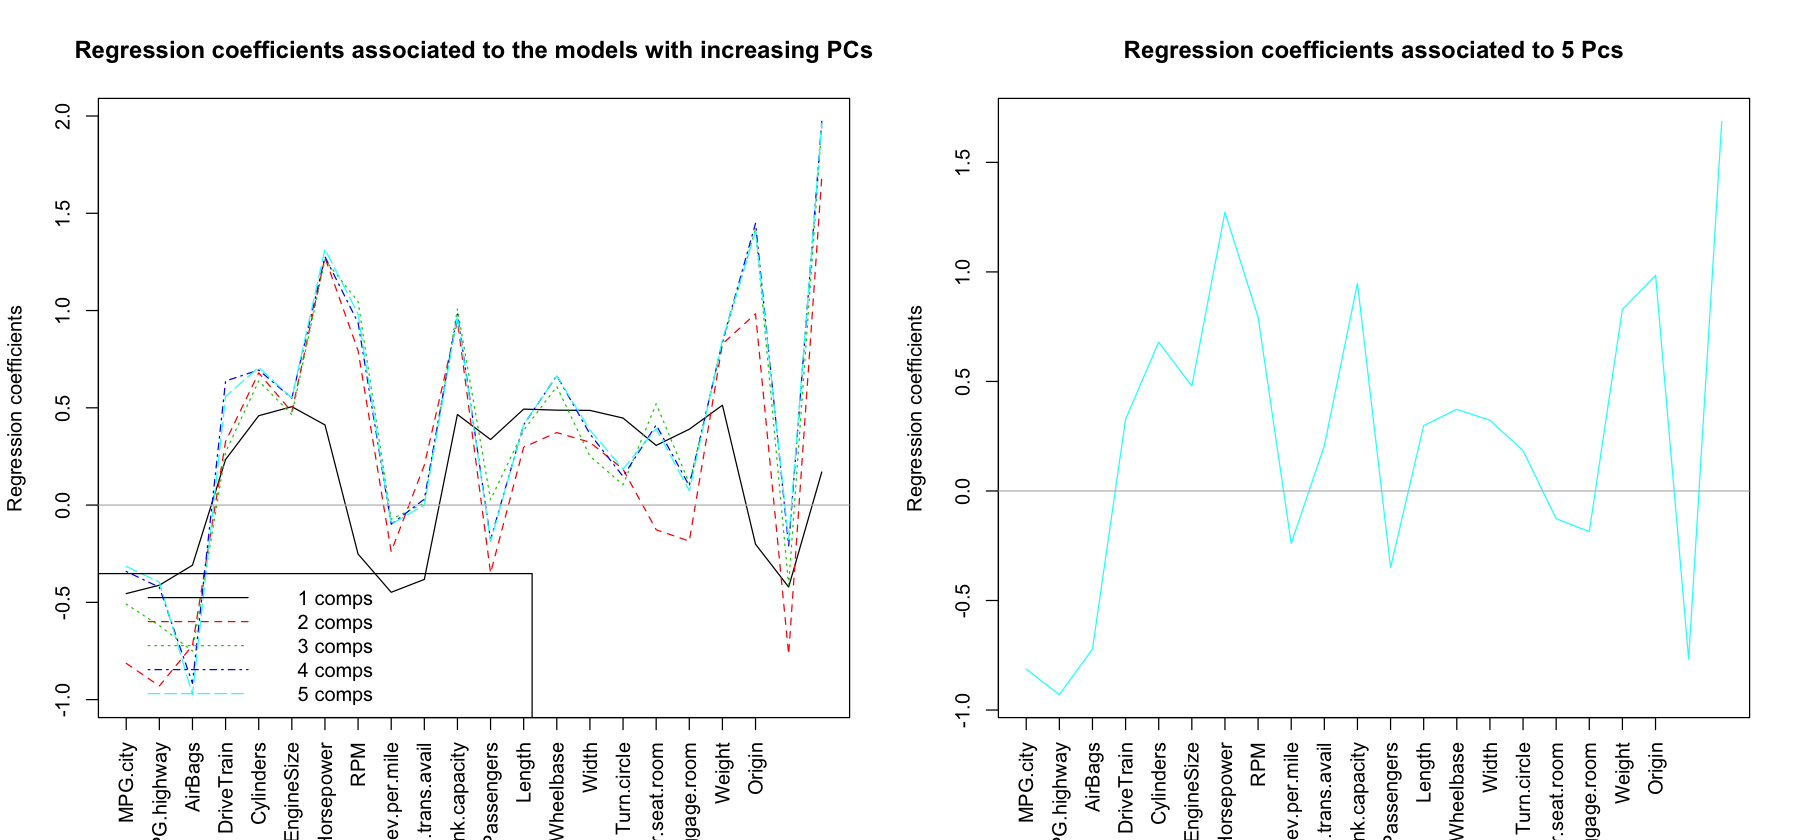

In [187]:
#plot

par(mfrow=c(1,2))
options(repr.plot.width = 15, repr.plot.height = 7)
coefplot(m.pcr, ncomp=1:5, legendpos='bottomleft', main='',
        xlab='', ylab='Regression coefficients',xaxt="n")
axis(1, at=1:20, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)
title("Regression coefficients associated to the models with increasing PCs")

coefplot(m.pcr, ncomp=2, main='', xlab='',,xaxt="n", ylab='Regression coefficients',col="cyan")
title("Regression coefficients associated to 5 Pcs")
axis(1, at=1:20, labels=colnames(mydata)[-1], las=2, cex=1, cex.axis=1)

Let's evaluate the presence of of groups of observations or outliers through the scores. We do not  see a kind of trends  in the groups. 

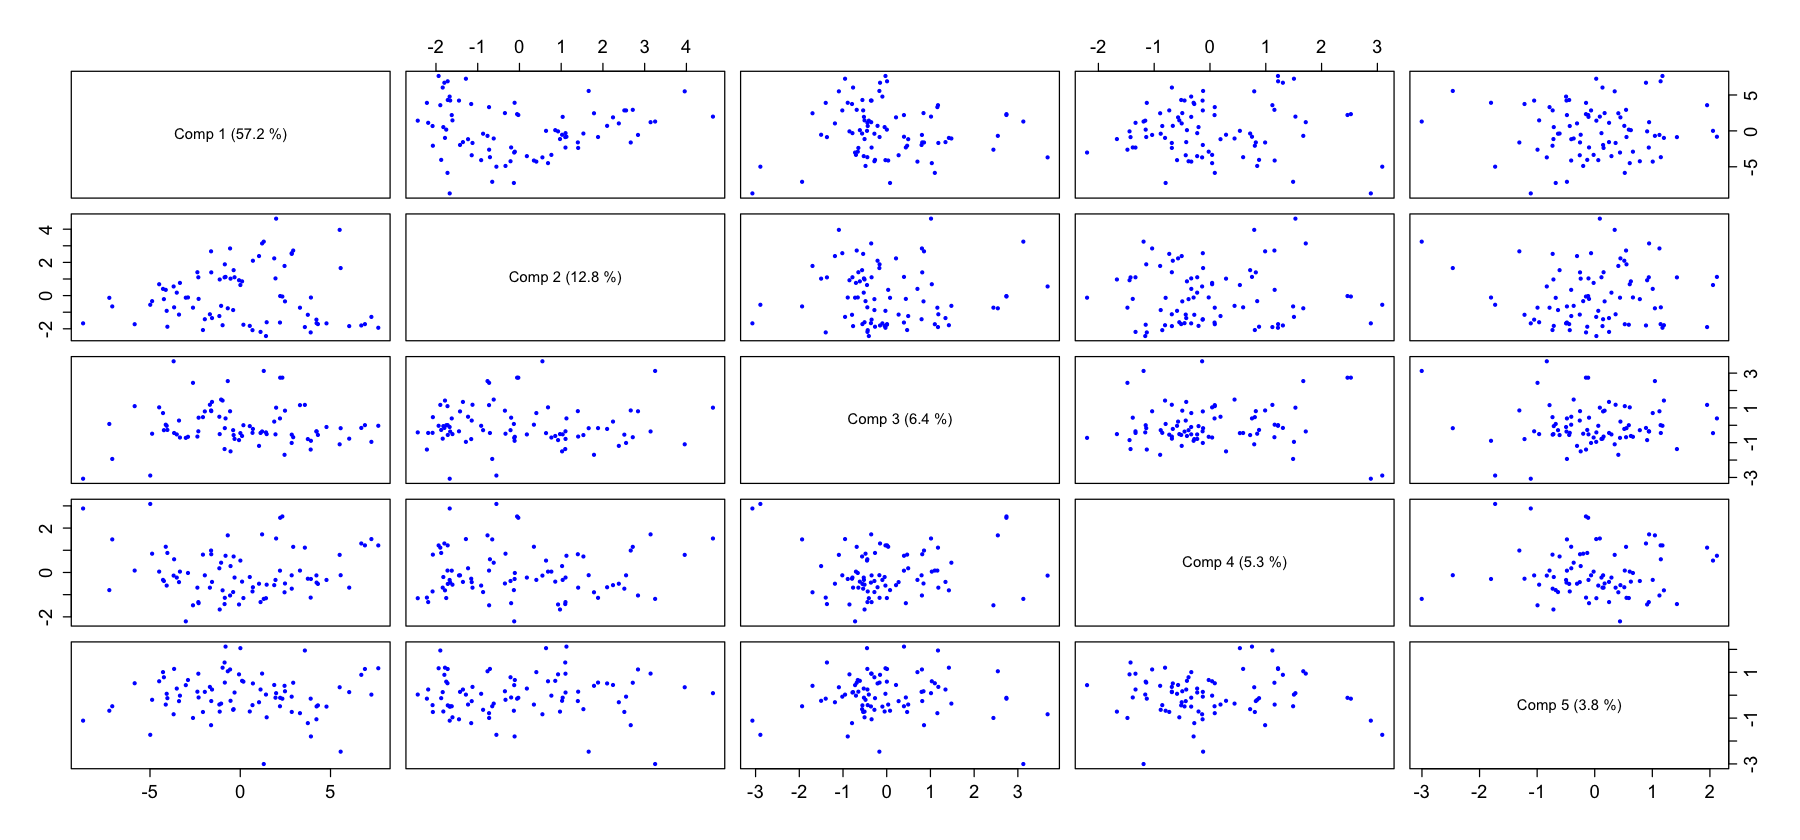

In [190]:
scoreplot(m.pcr, comps=1:5, cex=0.5, cex.lab=1.4, cex.axis=1.4, pch=19,col="blue")


Finally, evaluate the predictions from the model.
Values does not  suggest a good behavior of the model.

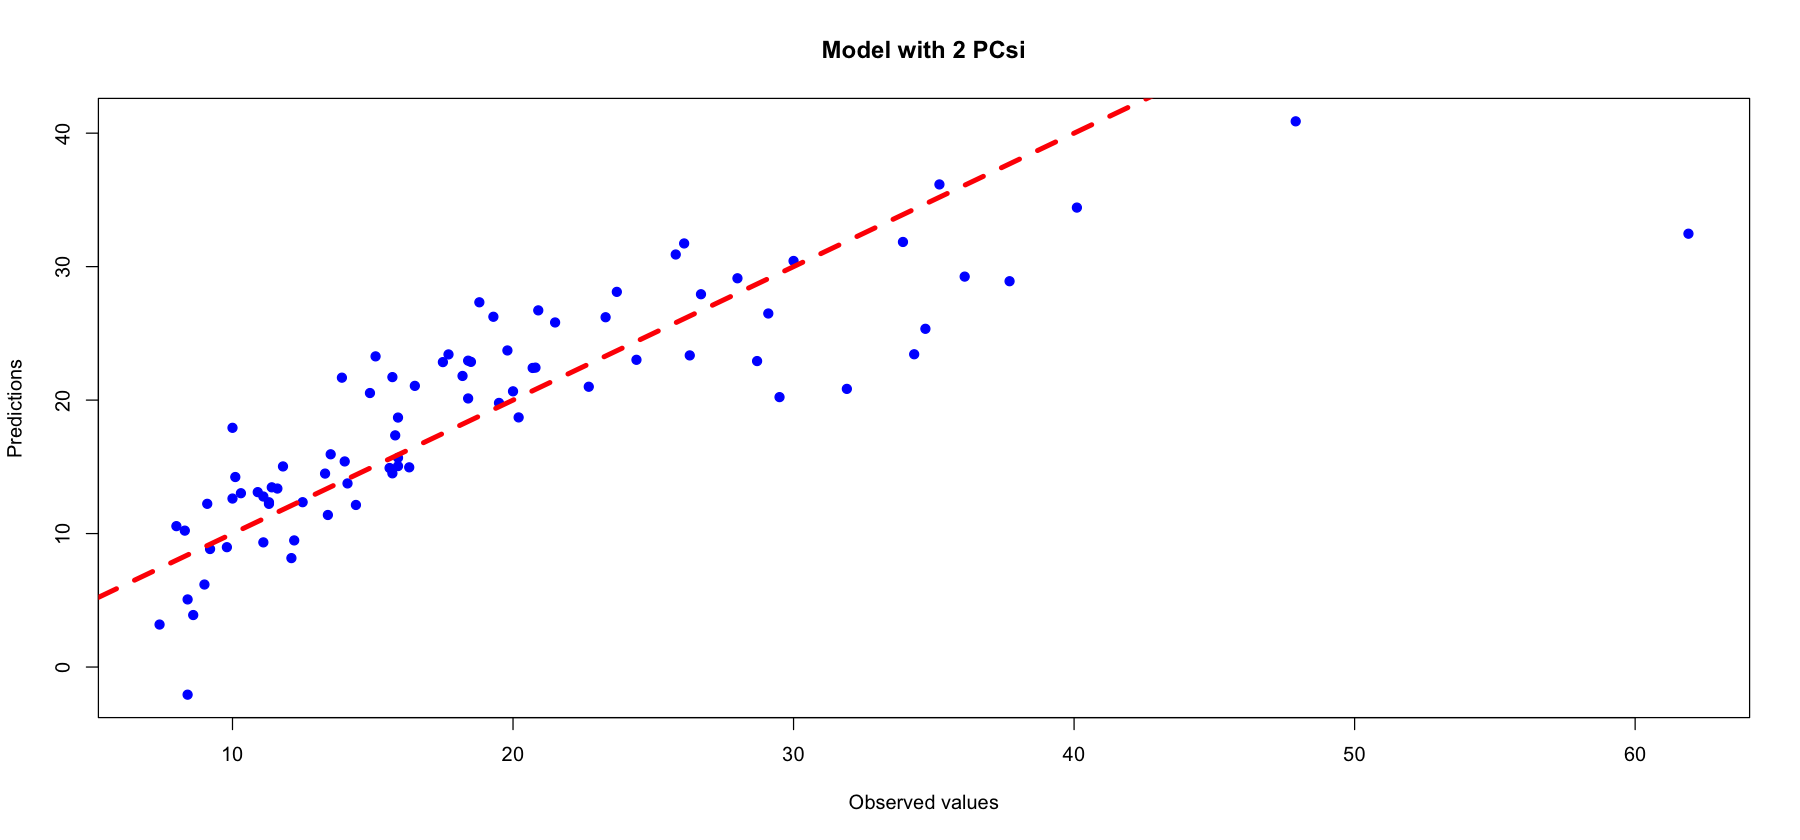

In [201]:
# plot predizione
plot(mydata$Price,predict(m.pcr,mydata,ncomp=2), xlab='Observed values', ylab='Predictions',
        main='Model with 2 PCsi',col="blue",pch=19)
abline(0, 1, col="red",lt=2,lwd=4)

Finally we compute the MSE considering 2 components which is equal to: 31. This is pretty high meaning that as shown in the clustering plot above the PCA is not satisfactory

In [200]:
pcr.pred=predict(m.pcr,mydata,ncomp=2)
mean((pcr.pred-mydata$Price)^2)

[1] 30.90661

# Conclusion

Base on MSE we have:
- ... for lasso

- for ridge

- for automatic selection

- for PCA

So based on MSE the best approach is ..... By the way with PCA with 2 components we have a simpler model this is why we have an higher MSE probably. 